In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

In [2]:
COMPANY_IDENTIFIER_LIST = [
    'DL',
    'DW',
    'EMA',
    'EMM',
    'EMT',
    'EMF',
    'ST',
    'GRG',
    'EL',
    'VS',
]

In [3]:
mba = msrp_band_analyzer.MSRPBand()
mba.update_company_data(COMPANY_IDENTIFIER_LIST)

Verifying download summaries for license C10-0000408-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-05-04
Found bad download summary for license C10-0000408-LIC on date 2022-03-09

Verifying download summaries for license C10-0000169-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-05-04
Found bad download summary for license C10-0000169-LIC on date 2022-03-09

Verifying download summaries for license MR282376...
Earliest download summary: 2020-01-01
Latest download summary: 2022-05-04
Found bad download summary for license MR282376 on date 2022-03-31
Found bad download summary for license MR282376 on date 2022-03-24

Verifying download summaries for license MR283369...
Earliest download summary: 2020-01-01
Latest download summary: 2022-05-04
Found bad download summary for license MR283369 on date 2022-03-05

Verifying download summaries for license C9-0000370-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 202

/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/royluo/platform/services/api-server/scripts/underwriting/msr

/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A valu

/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A valu

### Combining same product categories with different measurements ### 	


/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Breaking down product names into different brands ### 	


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Available combined product category name in costs dataframe ### 	
['buds' 'vape cartridge' 'other concentrate' 'infused' 'shake/trim'
 'concentrate' 'edible' 'flower' 'pre-roll infused' 'extract'
 'pre-roll flower' 'pre-roll leaf' 'topical' 'tincture' 'capsule' 'shake'
 'wet whole plants' 'vape product' 'raw pre-rolls' 'seeds'
 'infused butter/oil' 'infused pre-rolls' 'kief' 'infused beverage'
 'shake/trim allocated for extraction' 'clone - cutting']
### Available combined product category name in sales dataframe ### 	
['other concentrate' 'flower' 'edible' 'pre-roll flower' 'buds'
 'concentrate' 'infused' 'shake/trim' 'extract' 'vape cartridge'
 'pre-roll infused' 'pre-roll leaf' 'topical' 'immature plants' 'capsule'
 'tincture' 'shake' 'raw pre-rolls' 'vape product'
 'shake/trim allocated for extraction' 'infused pre-rolls'
 'infused butter/oil' 'seeds' 'infused beverage' 'kief' 'clone - cutting']


In [4]:
mba.output_time_series_metadata()

In [3]:
from underwriting import msrp_band_analyzer_testing
TESTING_COMPANY_NAMES = [
    'TT',
    'MD',
    'DWF',
    'GHC',
    'SV',
    '99HT'
]

In [6]:
mba_test = msrp_band_analyzer_testing.MSRPTest()

In [7]:
mba_test.update_test_set(TESTING_COMPANY_NAMES)

Verifying download summaries for license C10-0000414-LIC...
Earliest download summary: 2021-01-01
Latest download summary: 2022-05-09
Found bad download summary for license C10-0000414-LIC on date 2022-04-12
Found bad download summary for license C10-0000414-LIC on date 2022-04-06

Verifying download summaries for license CCL18-0000591...
Earliest download summary: 2021-01-01
Latest download summary: 2022-05-09

Verifying download summaries for license C11-0000985-LIC...
Earliest download summary: 2021-01-01
Latest download summary: 2022-05-09

Verifying download summaries for license CDPH-10003269...
Earliest download summary: 2021-01-01
Latest download summary: 2022-05-09

Verifying download summaries for license C9-0000247-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-05-09
Found bad download summary for license C9-0000247-LIC on date 2022-05-05
Found bad download summary for license C9-0000247-LIC on date 2022-04-12

Verifying download summaries for lic

/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:382: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/royluo/platform/services/api-server/scripts/underwriting/msr

/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:382: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/royluo/platform/services/api-server/scripts/underwriting/msr

/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:382: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:382: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:382: SettingWithCopyWarning: 
A valu

### Combining same product categories with different measurements ### 	


/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/royluo/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Breaking down product names into different brands ### 	


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Available combined product category name in costs dataframe ### 	
['flower' 'pre-roll flower' 'edible' 'vape cartridge' 'extract'
 'other concentrate' 'capsule' 'tincture' 'pre-roll infused' 'topical'
 'pre-roll leaf' 'seeds' 'infused' 'concentrate' 'shake/trim' 'shake'
 'buds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['vape cartridge' 'extract' 'flower' 'pre-roll flower' 'other concentrate'
 'tincture' 'edible' 'pre-roll infused' 'topical' 'capsule'
 'pre-roll leaf' 'seeds' 'infused' 'buds' 'bud allocated for extraction'
 'concentrate' 'shake/trim' 'shake' 'infused butter/oil']


In [8]:
mba_test.__dict__.keys()

dict_keys(['company_identifier_list', 'transfer_start_date', 'sales_start_date', 'current_month', 'measurement_dict', 'company_costs_df', 'company_sales_df', 'msrp_summary_table', 'msrp_summary_table_by_time', 'default_price_column', 'outlier_df', 'confidence_band_multiplier', 'outside_band_costs_df', 'inside_band_costs_df', 'train_band_costs_dict', 'outside_band_sales_df', 'inside_band_sales_df', 'train_band_sales_dict', 'non_compatible_timeframe_costs_df', 'non_compatible_timeframe_sales_df'])

In [9]:
mba_test.company_sales_df

license_number receipt_number rt_type sales_customer_type  \
742927   C9-0000247-LIC     0005368280  active            Consumer   
741404   C9-0000247-LIC     0007606208  active            Consumer   
741405   C9-0000247-LIC     0007606208  active            Consumer   
741406   C9-0000247-LIC     0007606207  active            Consumer   
741407   C9-0000247-LIC     0007606207  active            Consumer   
...                 ...            ...     ...                 ...   
4145     C9-0000146-LIC     0184675518  active            Consumer   
4146     C9-0000146-LIC     0184675518  active            Consumer   
4147    C10-0000414-LIC     0184647836  active            Consumer   
4138     C9-0000146-LIC     0184676463  active            Consumer   
0       C10-0000414-LIC     0186113050  active            Consumer   

                         sales_datetime sales_month  total_packages  \
742927        2020-01-01 00:13:33+00:00     2020-01               2   
741404        2020-01-22 14:20:55+00:00     2020-01              10   
741405        2020-01-22 14:20:55+00:00     2020-01              10   
741406        2020-01-22 14:15:41+00:00     2020-01               2   
741407        2020-01-22 14:15:41+00:00     2020-01               2   
...                                 ...         ...             ...   
4145   2022-05-03 15:58:27.240000+00:00     2022-05               3   
4146   2022-05-03 15:58:27.240000+00:00     2022-05               3   
4147          2022-05-03 15:48:50+00:00     2022-05               3   
4138   2022-05-03 16:07:57.060000+00:00     2022-05               6   
0             2022-05-09 10:56:33+00:00     2022-05               2   

        rt_total_price tx_type tx_package_id          tx_package_label  \
742927           85.00  active       1601818  1A406030000601A000030761   
741404          568.00  active       1659802  1A40603000092E5000004214   
741405          568.00  active       2083585  1A40603000092E5000010350   
741406           63.00  active       1775025  1A4060300006D0A000044576   
741407           63.00  active       2142208  1A4060300008D22000010684   
...                ...     ...           ...                       ...   
4145            248.00  active      23913701  1A406030001E1A5000255066   
4146            248.00  active      24335266  1A4060300006D0A000674081   
4147             45.43  active      24403185  1A4060300006027000164013   
4138            136.00  active      24445805  1A406030001E1A5000276919   
0                51.63  active      24675929  1A4060300007667000224337   

                                          tx_product_name  \
742927           (SI) ABX Blue Dream Vape Cartridge (.5g)   
741404        Heavy Hitters: 1g Cart: Northern Lights [I]   
741405             Heavy Hitters: 1g Cart: Jack Herer [S]   
741406   Raw Garden Cartridge 0.5g Indica Mendo Punch ...   
741407              STIIIZY - Strawberry Cough Pod - 0.5g   
...                                                   ...   
4145                         Pure Beauty Babies Black Box   
4146     Garden Society Sativa Brighter Day Preroll .3...   
4147    The Exotic Pack – 1g CureJOINT 3 Pack - Bacio ...   
4138           Lost Farm Gummies Juicy Peach 100mg Mimosa   
0       Drink Loud Kush Berry - Filled Bottle (50g) - ...   

              tx_product_category_name tx_unit_of_measure  tx_quantity_sold  \
742927  Vape Cartridge (volume - each)               Each               1.0   
741404  Vape Cartridge (volume - each)               Each               1.0   
741405  Vape Cartridge (volume - each)               Each               1.0   
741406  Vape Cartridge (volume - each)               Each               1.0   
741407  Vape Cartridge (volume - each)               Each               1.0   
...                                ...                ...               ...   
4145                   Pre-Roll Flower               Each               2.0   
4146                   Pre-Roll Flower               Each    

In [10]:
sales_df = mba_test.company_sales_df

In [15]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Flower']

license_number receipt_number rt_type sales_customer_type  \
737769   C9-0000247-LIC     0007606202  active            Consumer   
737734   C9-0000247-LIC     0007606212  active            Consumer   
737743   C9-0000247-LIC     0007606210  active            Consumer   
737736   C9-0000247-LIC     0007606212  active            Consumer   
737742   C9-0000247-LIC     0007606210  active            Consumer   
...                 ...            ...     ...                 ...   
1628    C10-0000414-LIC     0184250681  active            Consumer   
1643    C10-0000414-LIC     0184242930  active            Consumer   
1730     C9-0000247-LIC     0184233851  active            Consumer   
1736     C9-0000247-LIC     0184233583  active            Consumer   
1735     C9-0000247-LIC     0184233583  active            Consumer   

                  sales_datetime sales_month  total_packages  rt_total_price  \
737769 2020-01-22 12:02:25+00:00     2020-01               1           56.00   
737734 2020-01-22 15:45:07+00:00     2020-01               3          112.00   
737743 2020-01-22 14:59:24+00:00     2020-01               4           61.00   
737736 2020-01-22 15:45:07+00:00     2020-01               3          112.00   
737742 2020-01-22 14:59:24+00:00     2020-01               4           61.00   
...                          ...         ...             ...             ...   
1628   2022-05-01 18:23:05+00:00     2022-05               3           74.24   
1643   2022-05-01 17:53:55+00:00     2022-05               3           52.75   
1730   2022-05-01 17:17:54+00:00     2022-05               3           61.30   
1736   2022-05-01 17:16:48+00:00     2022-05               4          132.00   
1735   2022-05-01 17:16:48+00:00     2022-05               4          132.00   

       tx_type tx_package_id          tx_package_label  \
737769  active       1523548  1A4060300004C31000000896   
737734  active       1842756  1A4060300003FB1000023226   
737743  active       1389901  1A40603000071B1000000195   
737736  active       1842752  1A4060300003FB1000023224   
737742  active       1523548  1A4060300004C31000000896   
...        ...           ...                       ...   
1628    active      23708789  1A406030000E80A000581366   
1643    active      24403184  1A4060300006027000164012   
1730    active      24287099  1A4060300003B66000124623   
1736    active      23276856  1A4060300005B14000369567   
1735    active      24287099  1A4060300003B66000124623   

                                          tx_product_name  \
737769                   Entheo - Magic High Preroll Case   
737734              CRU Littles-.5g PreRoll-Trackdaddy OG   
737743  CRU CRU / Lamb's Bread Preroll 0.5g 1 - Beginn...   
737736              CRU Littles-.5g PreRoll-Sundae Driver   
737742                   Entheo - Magic High Preroll Case   
...                                                   ...   
1628     Glass House Preroll 0.5g CBD Jellyfish 5-Pack...   
1643    Gas Pack – 1g CUREjoint 3 Pack - SFV OG, Skywa...   
1730            Daze Off - Malibu Pure Kush Pre-Roll (1g)   
1736                    FloraCal Panna Cotta (1g) Preroll   
1735            Daze Off - Malibu Pure Kush Pre-Roll (1g)   

       tx_product_category_name tx_unit_of_measure  tx_quantity_sold  \
737769          Pre-Roll Flower               Each               8.0   
737734          Pre-Roll Flower               Each               1.0   
737743          Pre-Roll Flower               Each               1.0   
737736          Pre-Roll Flower               Each               1.0   
737742          Pre-Roll Flower               Each               1.0   
...                         ...                ...               ...   
1628            Pre-Roll Flower               Each               1.0   
1643            Pre-Roll Flower               Each               1.0   
1730            Pre-Roll Flower               Each               1.0   
1736            Pre-Roll Flower               Each       

In [17]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Flower'].extracted_units.value_counts()

Series([], Name: extracted_units, dtype: int64)

In [13]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Flower'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

AttributeError: 'Float64Index' object has no attribute 'remove_unused_levels'

In [ ]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Flower'].groupby('extracted_units')['tx_price_per_unit'].describe()

In [ ]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Infused'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

In [19]:
sales_df[sales_df.tx_product_category_name == 'Shake (Packaged Half Ounce - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count       mean       std    min    25%    50%    75%   max
extracted_units                                                              
14.0             467.0  28.964615  3.101985  17.25  28.88  28.88  28.88  50.0

In [20]:
sales_df[(sales_df.extracted_units == 3.50)&(sales_df.tx_product_category_name == 'Flower (packaged - each)')]

license_number receipt_number rt_type sales_customer_type  \
649485  C10-0000414-LIC     0081035441  active            Consumer   
649650  C10-0000414-LIC     0080987353  active            Consumer   
649678  C10-0000414-LIC     0080916116  active            Consumer   
650723  C10-0000414-LIC     0080837347  active            Consumer   
650997  C10-0000414-LIC     0080786634  active            Consumer   
...                 ...            ...     ...                 ...   
1344    C10-0000414-LIC     0184383946  active            Consumer   
1447    C10-0000414-LIC     0184350887  active            Consumer   
1386    C10-0000414-LIC     0184364476  active            Consumer   
1405    C10-0000414-LIC     0184358736  active            Consumer   
1627    C10-0000414-LIC     0184250681  active            Consumer   

                  sales_datetime sales_month  total_packages  rt_total_price  \
649485 2021-02-20 12:47:22+00:00     2021-02               1           25.01   
649650 2021-02-20 09:03:22+00:00     2021-02               1           25.01   
649678 2021-02-19 21:36:07+00:00     2021-02               2           61.11   
650723 2021-02-19 13:08:14+00:00     2021-02               2           76.38   
650997 2021-02-19 09:09:23+00:00     2021-02               5          176.24   
...                          ...         ...             ...             ...   
1344   2022-05-02 13:12:38+00:00     2022-05               2           36.81   
1447   2022-05-02 11:07:20+00:00     2022-05               1           10.82   
1386   2022-05-02 12:03:17+00:00     2022-05               1           10.82   
1405   2022-05-02 11:33:21+00:00     2022-05               1            9.38   
1627   2022-05-01 18:23:05+00:00     2022-05               3           74.24   

       tx_type tx_package_id          tx_package_label  \
649485  active      11701113  1A4060300006D67000029556   
649650  active      11701113  1A4060300006D67000029556   
649678  active      11701113  1A4060300006D67000029556   
650723  active      11701113  1A4060300006D67000029556   
650997  active      11701113  1A4060300006D67000029556   
...        ...           ...                       ...   
1344    active      24630734  1A4060300009E40000001182   
1447    active      24630734  1A4060300009E40000001182   
1386    active      24630734  1A4060300009E40000001182   
1405    active      24630734  1A4060300009E40000001182   
1627    active      24630734  1A4060300009E40000001182   

                                          tx_product_name  \
649485        Brothers - 1/8th Mylar - Cactus Jack - 3.5g   
649650        Brothers - 1/8th Mylar - Cactus Jack - 3.5g   
649678        Brothers - 1/8th Mylar - Cactus Jack - 3.5g   
650723        Brothers - 1/8th Mylar - Cactus Jack - 3.5g   
650997        Brothers - 1/8th Mylar - Cactus Jack - 3.5g   
...                                                   ...   
1344    The Griffith Brand | Los Feliz Reserve | 3.5g ...   
1447    The Griffith Brand | Los Feliz Reserve | 3.5g ...   
1386    The Griffith Brand | Los Feliz Reserve | 3.5g ...   
1405    The Griffith Brand | Los Feliz Reserve | 3.5g ...   
1627    The Griffith Brand | Los Feliz Reserve | 3.5g ...   

        tx_product_category_name tx_unit_of_measure  tx_quantity_sold  \
649485  Flower (packaged - each)               Each               1.0   
649650  Flower (packaged - each)               Each               1.0   
649678  Flower (packaged - each)               Each               1.0   
650723  Flower (packaged - each)               Each               1.0   
650997  Flower (packaged - each)               Each               2.0   
...                          ...                ...               ...   
1344    Flower (packaged - each)               Each               2.0   
1447    Flower (packaged - each)               Each               2.0   
1386    Flower (packaged - each)               Each               2.0   
1405    Flower (packaged - each)               

# Check new approach

In [21]:
temp_df = mba_test.company_sales_df

In [22]:
temp_df[temp_df.tx_product_category_name == 'Flower (packaged eighth - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count       mean        std        min        25%  \
extracted_units                                                        
1.00               193.0  52.481140  13.460011  23.380000  41.710000   
3.50             76560.0  10.045092   4.803979   0.005714   5.714286   
3.54              3933.0  14.549573   4.343263   0.053672  11.652542   
3.55              7568.0   6.846589   3.164279   0.184507   5.084507   
4.00              5244.0   6.986023   1.306873   0.207500   6.250000   
4.20               263.0   7.891557   2.288518   0.107143   5.952381   
7.00                54.0   5.424709   1.063748   3.478571   5.066786   

                       50%        75%        max  
extracted_units                                   
1.00             55.000000  65.000000  70.000000  
3.50              9.411429  13.720000  21.428571  
3.54             14.646893  16.949153  21.186441  
3.55              7.118310   8.135211  14.084507  
4.00              7.250000   7.492500   9.500000  
4.20              7.142857  10.714286  10.714286  
7.00              5.351429   5.351429   7.338571

In [23]:
temp_df[temp_df.tx_product_category_name == 'Pre-Roll Flower']

license_number receipt_number rt_type sales_customer_type  \
737769   C9-0000247-LIC     0007606202  active            Consumer   
737734   C9-0000247-LIC     0007606212  active            Consumer   
737743   C9-0000247-LIC     0007606210  active            Consumer   
737736   C9-0000247-LIC     0007606212  active            Consumer   
737742   C9-0000247-LIC     0007606210  active            Consumer   
...                 ...            ...     ...                 ...   
1628    C10-0000414-LIC     0184250681  active            Consumer   
1643    C10-0000414-LIC     0184242930  active            Consumer   
1730     C9-0000247-LIC     0184233851  active            Consumer   
1736     C9-0000247-LIC     0184233583  active            Consumer   
1735     C9-0000247-LIC     0184233583  active            Consumer   

                  sales_datetime sales_month  total_packages  rt_total_price  \
737769 2020-01-22 12:02:25+00:00     2020-01               1           56.00   
737734 2020-01-22 15:45:07+00:00     2020-01               3          112.00   
737743 2020-01-22 14:59:24+00:00     2020-01               4           61.00   
737736 2020-01-22 15:45:07+00:00     2020-01               3          112.00   
737742 2020-01-22 14:59:24+00:00     2020-01               4           61.00   
...                          ...         ...             ...             ...   
1628   2022-05-01 18:23:05+00:00     2022-05               3           74.24   
1643   2022-05-01 17:53:55+00:00     2022-05               3           52.75   
1730   2022-05-01 17:17:54+00:00     2022-05               3           61.30   
1736   2022-05-01 17:16:48+00:00     2022-05               4          132.00   
1735   2022-05-01 17:16:48+00:00     2022-05               4          132.00   

       tx_type tx_package_id          tx_package_label  \
737769  active       1523548  1A4060300004C31000000896   
737734  active       1842756  1A4060300003FB1000023226   
737743  active       1389901  1A40603000071B1000000195   
737736  active       1842752  1A4060300003FB1000023224   
737742  active       1523548  1A4060300004C31000000896   
...        ...           ...                       ...   
1628    active      23708789  1A406030000E80A000581366   
1643    active      24403184  1A4060300006027000164012   
1730    active      24287099  1A4060300003B66000124623   
1736    active      23276856  1A4060300005B14000369567   
1735    active      24287099  1A4060300003B66000124623   

                                          tx_product_name  \
737769                   Entheo - Magic High Preroll Case   
737734              CRU Littles-.5g PreRoll-Trackdaddy OG   
737743  CRU CRU / Lamb's Bread Preroll 0.5g 1 - Beginn...   
737736              CRU Littles-.5g PreRoll-Sundae Driver   
737742                   Entheo - Magic High Preroll Case   
...                                                   ...   
1628     Glass House Preroll 0.5g CBD Jellyfish 5-Pack...   
1643    Gas Pack – 1g CUREjoint 3 Pack - SFV OG, Skywa...   
1730            Daze Off - Malibu Pure Kush Pre-Roll (1g)   
1736                    FloraCal Panna Cotta (1g) Preroll   
1735            Daze Off - Malibu Pure Kush Pre-Roll (1g)   

       tx_product_category_name tx_unit_of_measure  tx_quantity_sold  \
737769          Pre-Roll Flower               Each               8.0   
737734          Pre-Roll Flower               Each               1.0   
737743          Pre-Roll Flower               Each               1.0   
737736          Pre-Roll Flower               Each               1.0   
737742          Pre-Roll Flower               Each               1.0   
...                         ...                ...               ...   
1628            Pre-Roll Flower               Each               1.0   
1643            Pre-Roll Flower               Each               1.0   
1730            Pre-Roll Flower               Each               1.0   
1736            Pre-Roll Flower               Each       

In [24]:
idx = ((temp_df['tx_unit_of_measure'] == 'Each') &
                           (temp_df['letter_gram_measure_from_product_name'].isna() == False) &
                           (temp_df['tx_product_category_name'] == 'Pre-Roll Flower'))

In [25]:
idx.sum()

58932

In [26]:
temp_df[temp_df.tx_product_category_name == 'Vape Cartridge (weight - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count       mean        std        min        25%  \
extracted_units                                                        
0.30               386.0  86.468653  47.845095   2.233333  58.975000   
0.33                48.0  54.049874   8.791592  32.575758  47.151515   
0.35               121.0  72.736009  13.572323  47.428571  69.028571   
0.36               257.0  72.279399  34.173369   0.444444  67.055556   
0.50             15707.0  52.275089  20.754180   0.040000  39.440000   
1.00             31763.0  37.228916  13.648847   0.020000  24.500000   

                       50%         75%         max  
extracted_units                                     
0.30             85.133333  133.333333  133.333333  
0.33             59.757576   59.757576   59.757576  
0.35             73.771429   76.085714  114.285714  
0.36             82.500000  102.555556  102.555556  
0.50             51.640000   66.000000  130.000000  
1.00             37.000000   46.000000   75.000000

In [27]:
temp_df[temp_df.tx_product_category_name == 'Flower (packaged gram - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count       mean       std     min    25%    50%    75%  \
extracted_units                                                             
1.0              8352.0   5.417581  7.228824   0.036   0.56   0.72  10.83   
2.0               252.0  10.298135  6.048809   0.370   0.83  14.44  14.44   
3.5                77.0  34.866753  6.254237  21.510  32.72  32.72  32.72   
5.0               543.0  34.065405  9.952720  17.230  22.21  36.65  36.65   

                   max  
extracted_units         
1.0              25.00  
2.0              14.44  
3.5              47.00  
5.0              55.00

In [28]:
temp_df[temp_df.tx_product_category_name == 'Flower (packaged gram - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count      mean       std       min       25%       50%  \
extracted_units                                                             
1.0              8352.0  5.417581  7.228824  0.036000  0.560000  0.720000   
2.0               252.0  5.149067  3.024405  0.185000  0.415000  7.220000   
3.5                77.0  9.961929  1.786925  6.145714  9.348571  9.348571   
5.0               543.0  6.813081  1.990544  3.446000  4.442000  7.330000   

                       75%        max  
extracted_units                        
1.0              10.830000  25.000000  
2.0               7.220000   7.220000  
3.5               9.348571  13.428571  
5.0               7.330000  11.000000

In [29]:
temp_df[temp_df.tx_product_category_name == 'Topical (volume - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count       mean        std    min      25%    50%    75%  \
extracted_units                                                              
28.0              28.0  33.886786   5.691078  19.80  32.1950  33.00  37.80   
56.0              41.0  35.541463  11.868782  13.50  27.0000  40.00  45.00   
84.0              10.0  28.112000  19.216625   0.05  10.1050  40.26  40.26   
168.0             97.0  19.615301   3.921416   4.40  17.8100  22.00  22.00   
224.0             24.0  74.913750   8.478075  48.00  71.6475  80.00  80.00   

                   max  
extracted_units         
28.0             42.00  
56.0             52.00  
84.0             40.26  
168.0            25.00  
224.0            80.00

In [30]:
temp_df[temp_df.tx_product_category_name == 'Topical (volume - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count      mean       std       min       25%       50%  \
extracted_units                                                            
28.0              28.0  1.210242  0.203253  0.707143  1.149821  1.178571   
56.0              41.0  0.634669  0.211943  0.241071  0.482143  0.714286   
84.0              10.0  0.334667  0.228769  0.000595  0.120298  0.479286   
168.0             97.0  0.116758  0.023342  0.026190  0.106012  0.130952   
224.0             24.0  0.334436  0.037849  0.214286  0.319855  0.357143   

                      75%       max  
extracted_units                      
28.0             1.350000  1.500000  
56.0             0.803571  0.928571  
84.0             0.479286  0.479286  
168.0            0.130952  0.148810  
224.0            0.357143  0.357143

In [31]:
temp_df_c = mba_test.company_costs_df

In [32]:
temp_df_c[temp_df_c.product_category_name == 'Vape Cartridge (weight - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count       mean        std        min        25%        50%  \
extracted_units                                                                 
0.30              21.0  18.464550  18.403520   0.066667   0.066667  28.333333   
0.33               6.0  30.303030   0.000000  30.303030  30.303030  30.303030   
0.35              13.0  32.967033   3.373644  25.714286  32.857143  34.285714   
0.36              11.0  41.161616   5.802589  36.111111  36.111111  36.111111   
0.50             676.0  22.717312   8.276397   0.040000  18.000000  24.000000   
1.00             748.0  18.994138   6.329209   0.020000  18.000000  20.000000   

                       75%        max  
extracted_units                        
0.30             35.000000  41.666667  
0.33             30.303030  30.303030  
0.35             34.285714  35.714286  
0.36             47.222222  47.222222  
0.50             28.000000  50.000000  
1.00             22.500000  45.000000

In [33]:
temp_df_c[temp_df_c.product_category_name == 'Flower (packaged gram - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count       mean       std       min      25%    50%   75%  \
extracted_units                                                               
1.0               98.0   4.065946  2.897661   0.01275   1.0000   4.25   6.0   
3.0                3.0   1.000000  0.000000   1.00000   1.0000   1.00   1.0   
3.5                4.0  20.797500  2.405000  17.19000  20.7975  22.00  22.0   
5.0               11.0  14.909091  3.935849  10.00000  10.0000  18.00  18.0   

                  max  
extracted_units        
1.0              15.0  
3.0               1.0  
3.5              22.0  
5.0              18.0

In [34]:
temp_df_c[temp_df_c.product_category_name == 'Flower (packaged gram - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count      mean       std       min       25%       50%  \
extracted_units                                                            
1.0               98.0  4.065946  2.897661  0.012750  1.000000  4.250000   
3.0                3.0  0.333333  0.000000  0.333333  0.333333  0.333333   
3.5                4.0  5.942143  0.687143  4.911429  5.942143  6.285714   
5.0               11.0  2.981818  0.787170  2.000000  2.000000  3.600000   

                      75%        max  
extracted_units                       
1.0              6.000000  15.000000  
3.0              0.333333   0.333333  
3.5              6.285714   6.285714  
5.0              3.600000   3.600000

In [35]:
temp_df_c[temp_df_c.product_category_name == 'Topical (volume - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count    mean       std   min   25%   50%   75%   max
extracted_units                                                       
28.0               3.0  16.000  1.732051  15.0  15.0  15.0  16.5  18.0
56.0               1.0  12.000       NaN  12.0  12.0  12.0  12.0  12.0
84.0               1.0  20.000       NaN  20.0  20.0  20.0  20.0  20.0
168.0              8.0   9.875  0.353553   9.0  10.0  10.0  10.0  10.0
224.0              3.0  36.000  0.000000  36.0  36.0  36.0  36.0  36.0

In [36]:
temp_df_c[temp_df_c.product_category_name == 'Topical (volume - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count      mean       std       min       25%       50%  \
extracted_units                                                            
28.0               3.0  0.571429  0.061859  0.535714  0.535714  0.535714   
56.0               1.0  0.214286       NaN  0.214286  0.214286  0.214286   
84.0               1.0  0.238095       NaN  0.238095  0.238095  0.238095   
168.0              8.0  0.058780  0.002104  0.053571  0.059524  0.059524   
224.0              3.0  0.160714  0.000000  0.160714  0.160714  0.160714   

                      75%       max  
extracted_units                      
28.0             0.589286  0.642857  
56.0             0.214286  0.214286  
84.0             0.238095  0.238095  
168.0            0.059524  0.059524  
224.0            0.160714  0.160714

In [37]:
temp_df.measurement_ratio_vs_gram.value_counts()

1.00      475524
3.50      160286
0.50       31838
224.00     11465
3.55        7568
14.00       6368
4.00        5997
3.54        4213
7.00        4144
28.00       4051
2.50        2869
5.00        1780
0.30        1550
56.00        836
0.33         833
182.00       527
336.00       513
0.35         400
4.20         344
2.00         303
0.36         257
4.50         123
0.40         117
112.00       114
0.20         114
0.70         113
168.00       109
616.00       107
187.60        88
176.96        66
700.00        62
29.40         32
8.00          28
84.00         21
94.64         10
17.50          1
Name: measurement_ratio_vs_gram, dtype: int64

In [38]:
temp_df.extracted_units.value_counts()

3.50      77916
1.00      54385
0.50      31838
224.00    11465
3.55       7568
4.00       5997
3.54       4213
28.00      3735
2.50       2869
5.00       1780
0.30       1550
14.00       952
56.00       836
0.33        833
182.00      527
336.00      513
0.35        400
4.20        344
2.00        303
0.36        257
4.50        123
0.40        117
0.20        114
112.00      114
0.70        113
168.00      109
616.00      107
187.60       88
176.96       66
7.00         65
700.00       62
29.40        32
8.00         28
84.00        21
94.64        10
17.50         1
Name: extracted_units, dtype: int64

In [39]:
temp_df.letter_gram_measure_from_product_name.value_counts()

3.5g     81530
1g       76287
0.5g     30700
.5g      29851
1.0g     15218
         ...  
3 G          5
50g          3
1.5 G        1
4 G          1
17.5g        1
Name: letter_gram_measure_from_product_name, Length: 128, dtype: int64

### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.5389756383011488 %


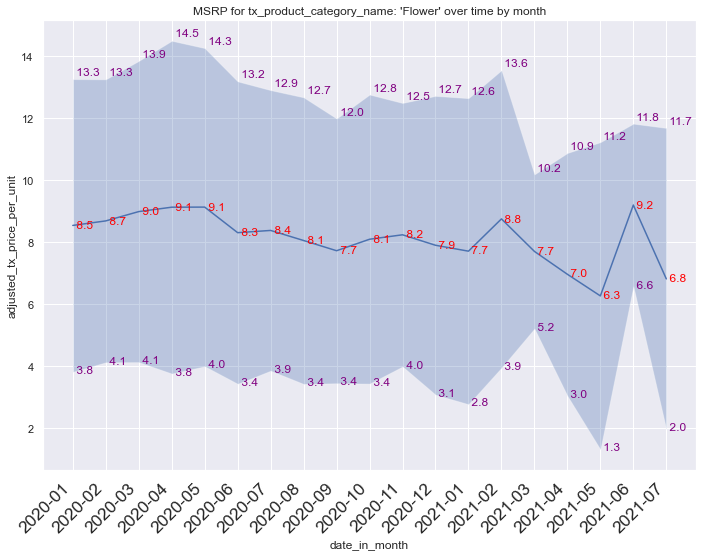

### % outliers for column category name Flower is 25.679999999999996% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


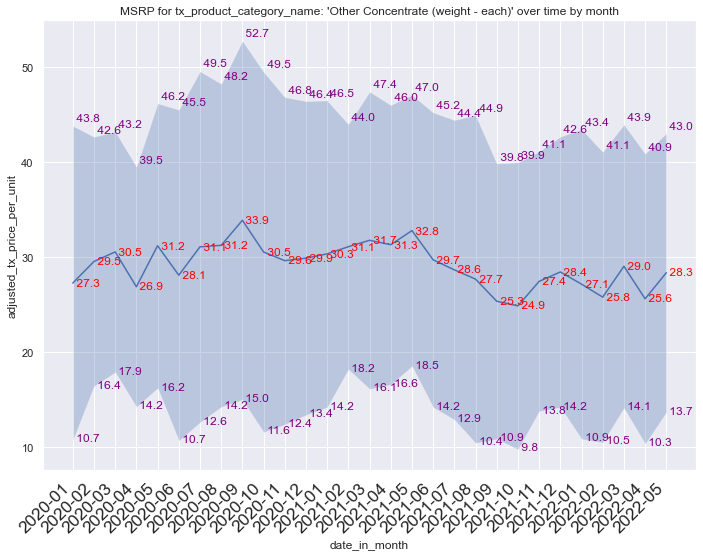

### % outliers for column category name Other Concentrate (weight - each) is 26.39% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.09937100269570275 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.9387388339764259 %


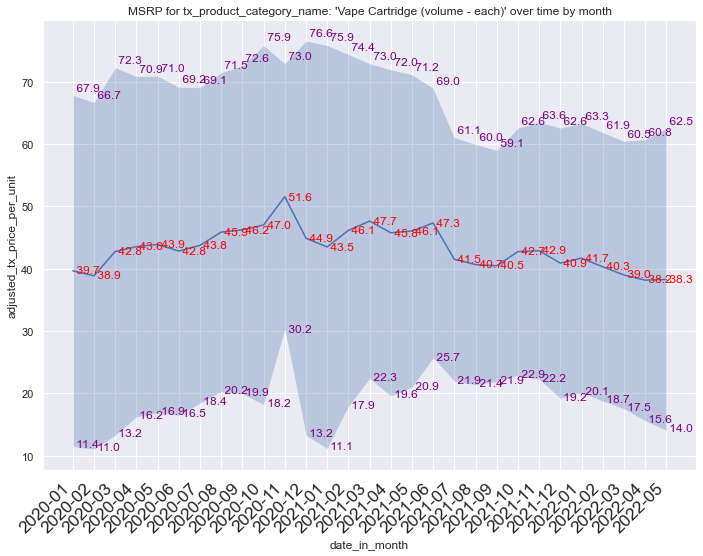

### % outliers for column category name Vape Cartridge (volume - each) is 20.84% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


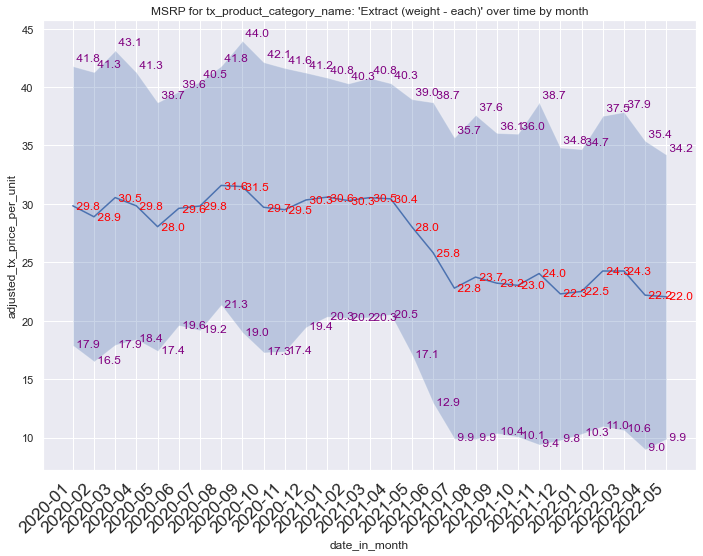

### % outliers for column category name Extract (weight - each) is 20.11% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 7.768413338219128 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.017847520100015 %


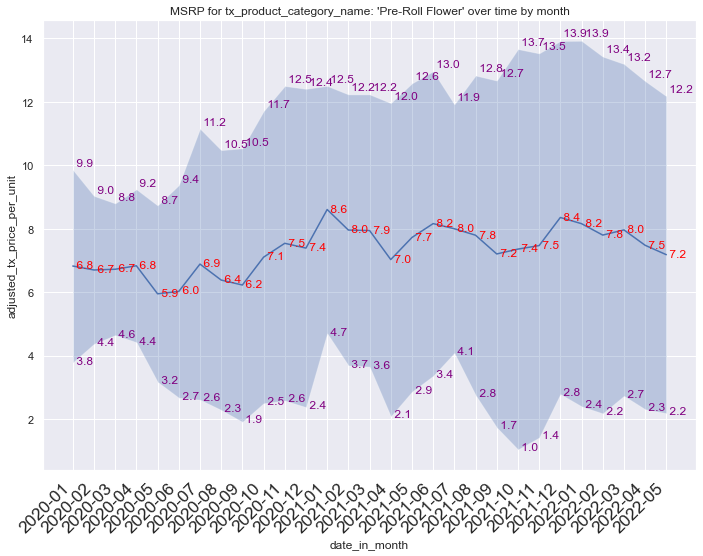

### % outliers for column category name Pre-Roll Flower is 56.88999999999999% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


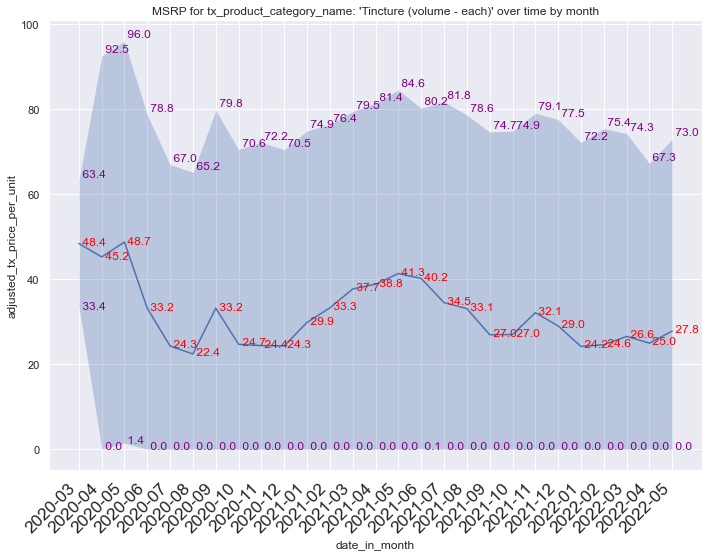

### % outliers for column category name Tincture (volume - each) is 8.49% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


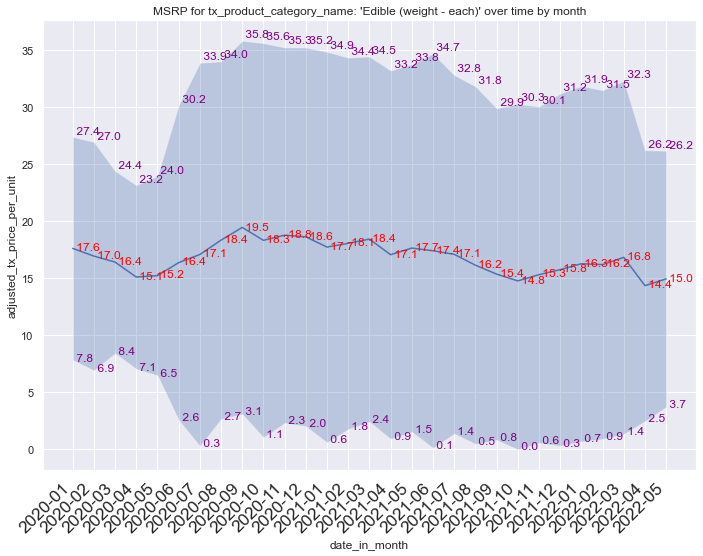

### % outliers for column category name Edible (weight - each) is 5.26% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.7087628865979382 %


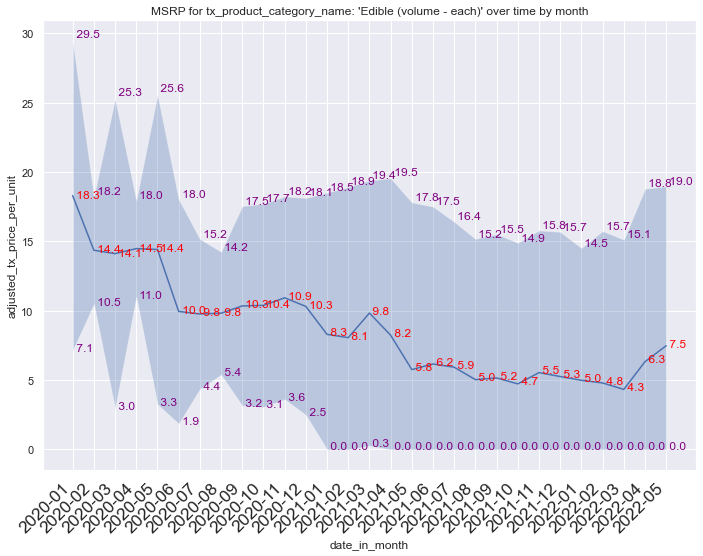

### % outliers for column category name Edible (volume - each) is 20.05% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


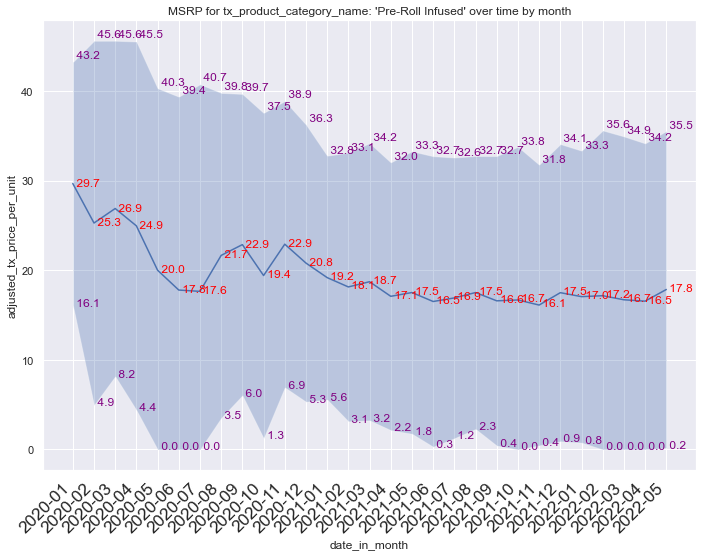

### % outliers for column category name Pre-Roll Infused is 22.66% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


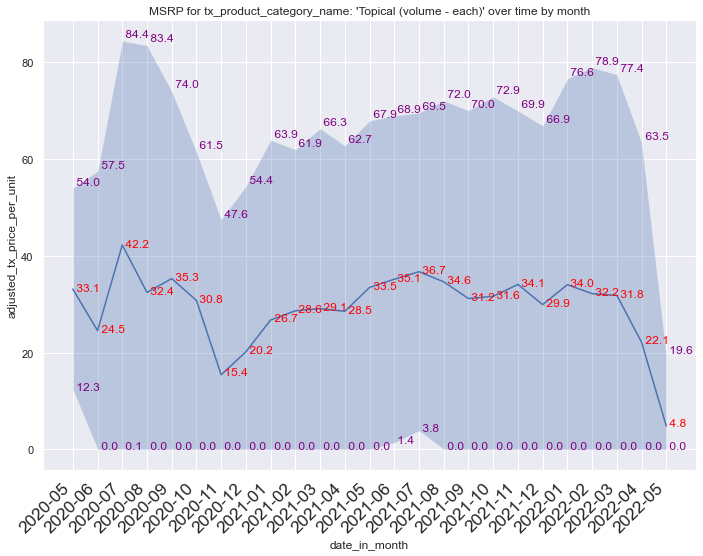

### % outliers for column category name Topical (volume - each) is 23.150000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 19.981354878806712 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.641392169049099 %


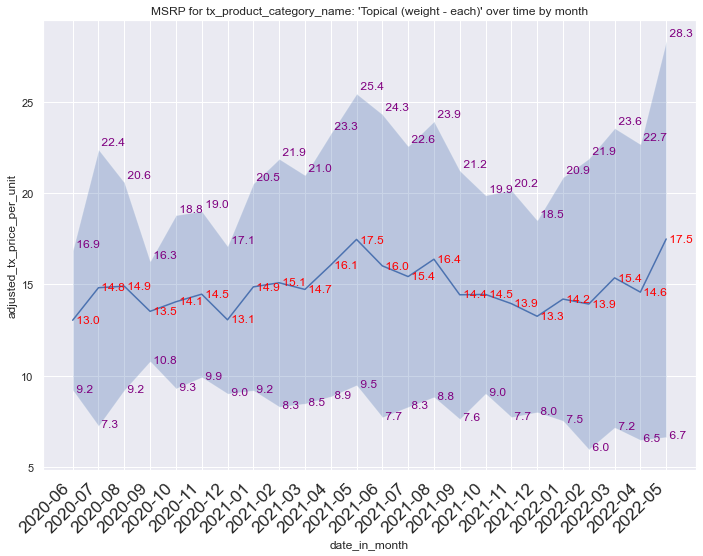

### % outliers for column category name Topical (weight - each) is 56.84% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Capsule (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


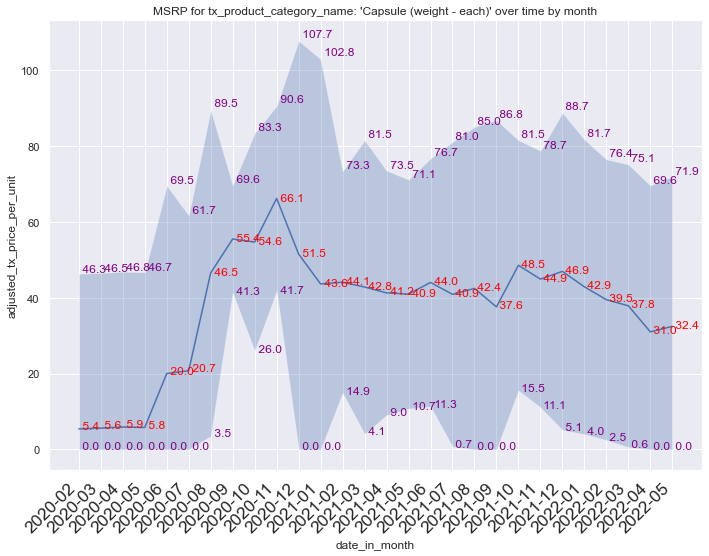

### % outliers for column category name Capsule (weight - each) is 28.720000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


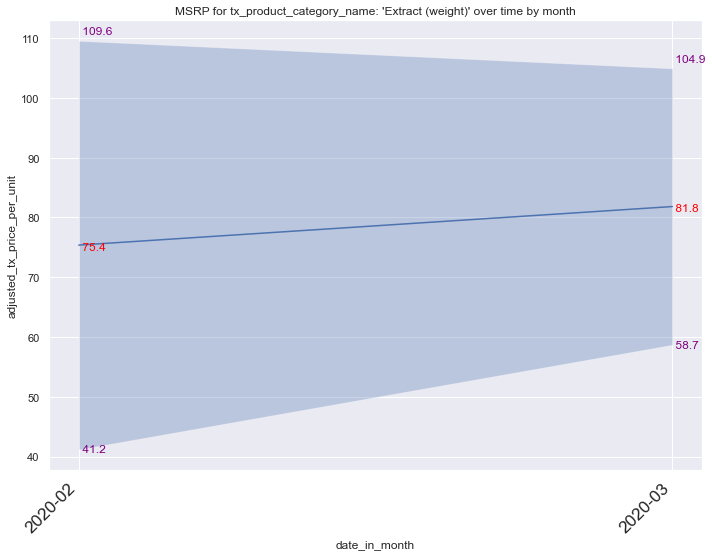

### % outliers for column category name Extract (weight) is 87.72% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0009333974266232948 %


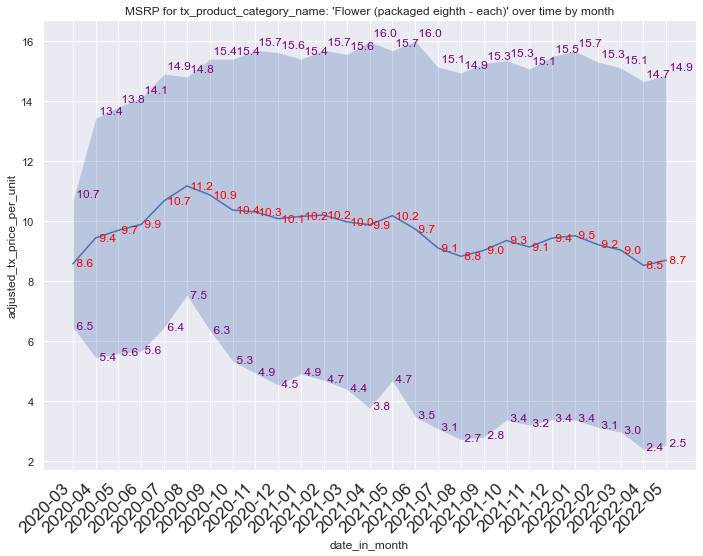

### % outliers for column category name Flower (packaged eighth - each) is 16.56% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Leaf ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


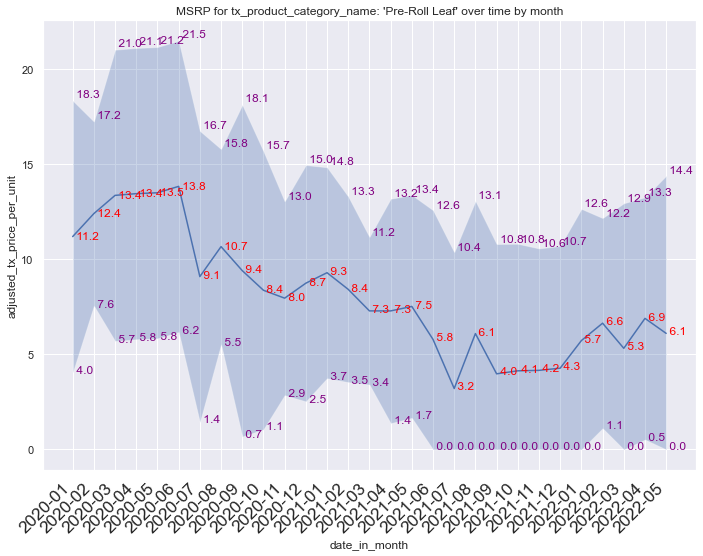

### % outliers for column category name Pre-Roll Leaf is 15.959999999999999% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


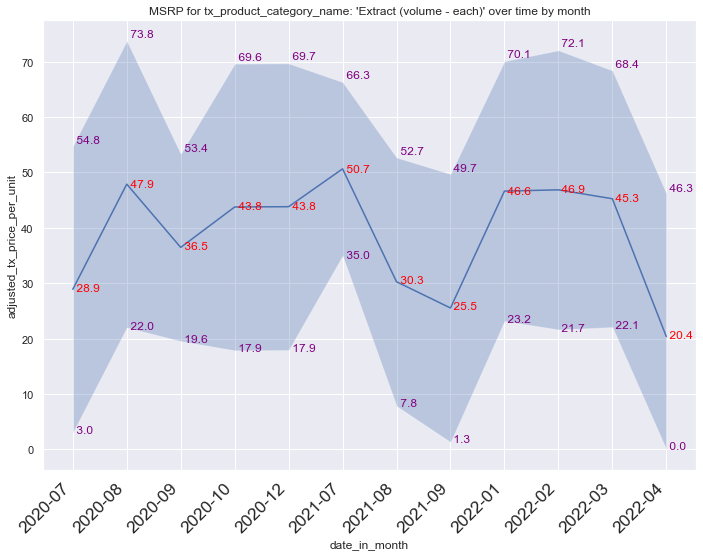

### % outliers for column category name Extract (volume - each) is 31.740000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


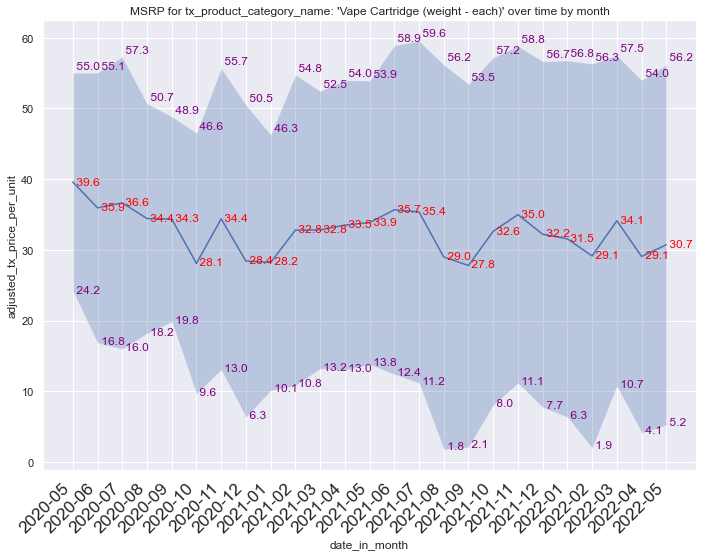

### % outliers for column category name Vape Cartridge (weight - each) is 18.18% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Seeds (each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


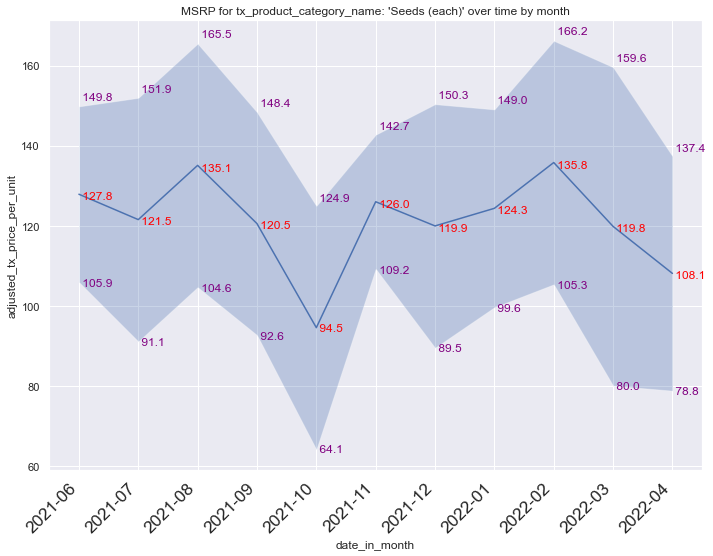

### % outliers for column category name Seeds (each) is 80.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged quarter - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.9999212660420439 %
Number of transactions outliers above Boxplot Whisker Maximum is 9.99921266042044 %


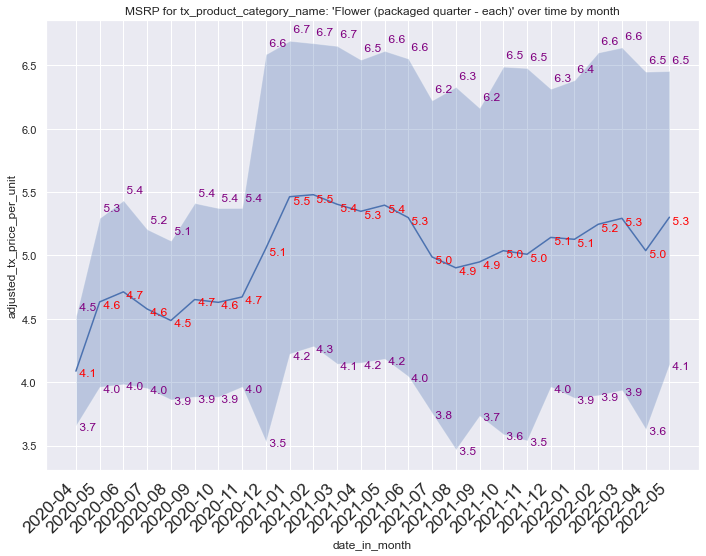

### % outliers for column category name Flower (packaged quarter - each) is 36.6% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


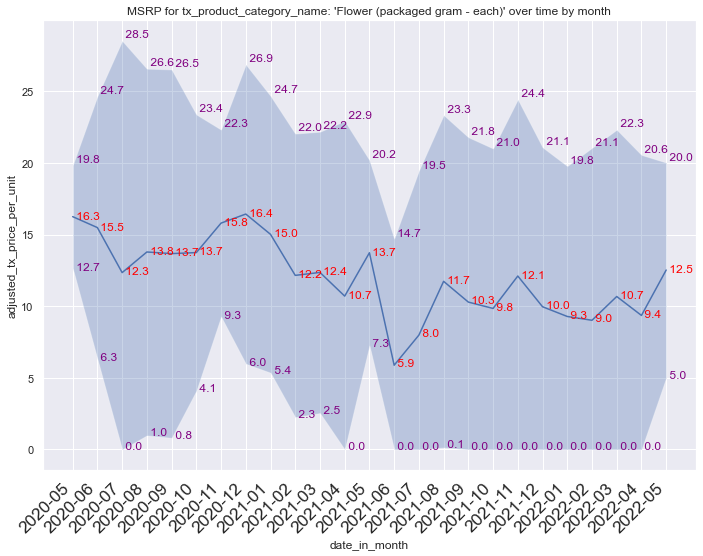

### % outliers for column category name Flower (packaged gram - each) is 3.81% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.3462113462900307 %


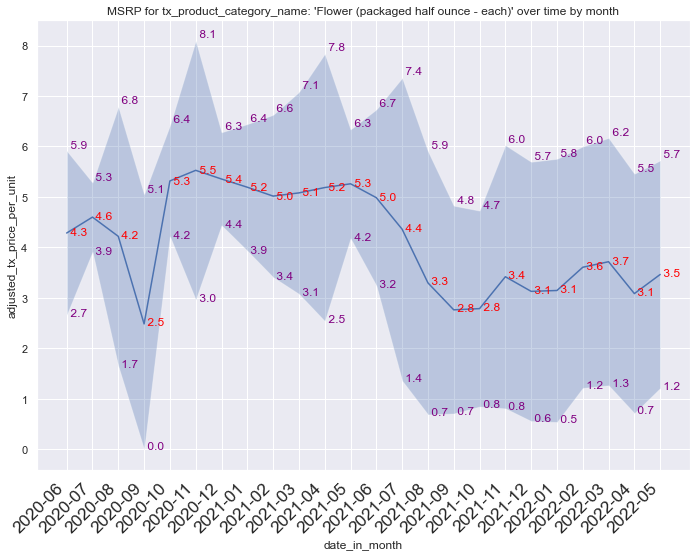

### % outliers for column category name Flower (packaged half ounce - each) is 58.86% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


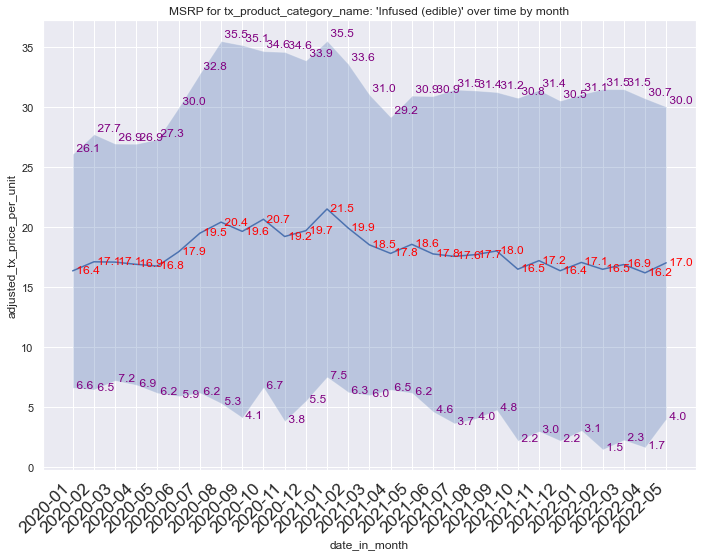

### % outliers for column category name Infused (edible) is 11.55% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Buds ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


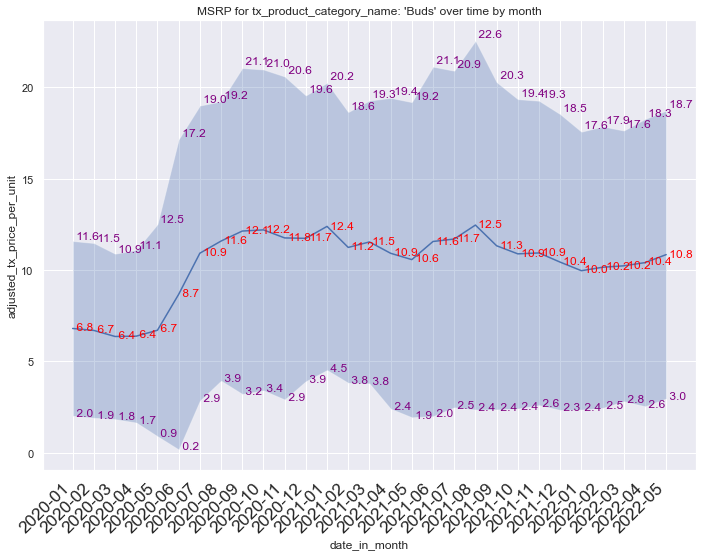

### % outliers for column category name Buds is 1.81% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Bud allocated for extraction ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate (Each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


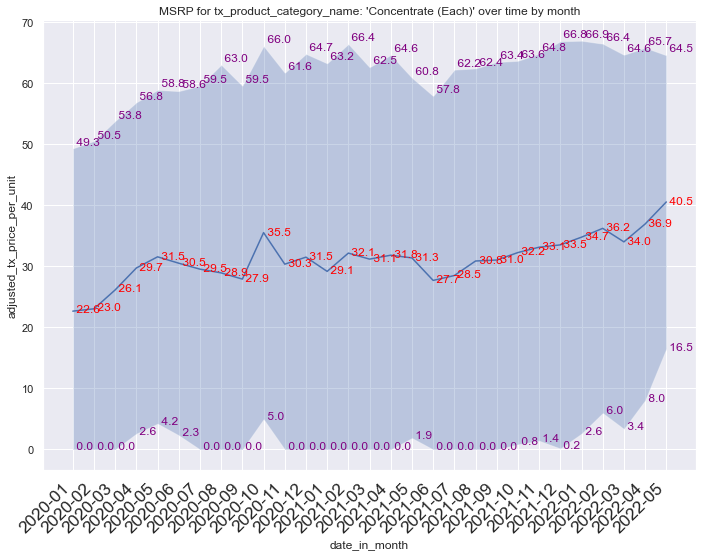

### % outliers for column category name Concentrate (Each) is 10.42% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (non-edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


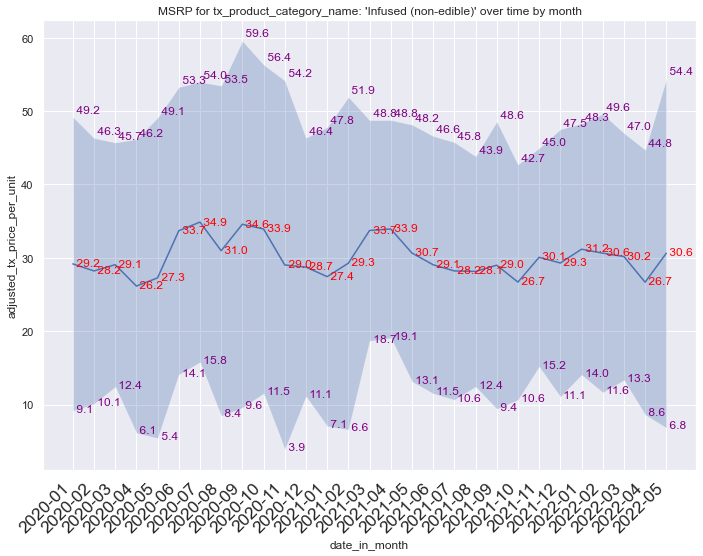

### % outliers for column category name Infused (non-edible) is 58.98% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 7.39867295547206 %
Number of transactions outliers above Boxplot Whisker Maximum is 19.124896741013135 %


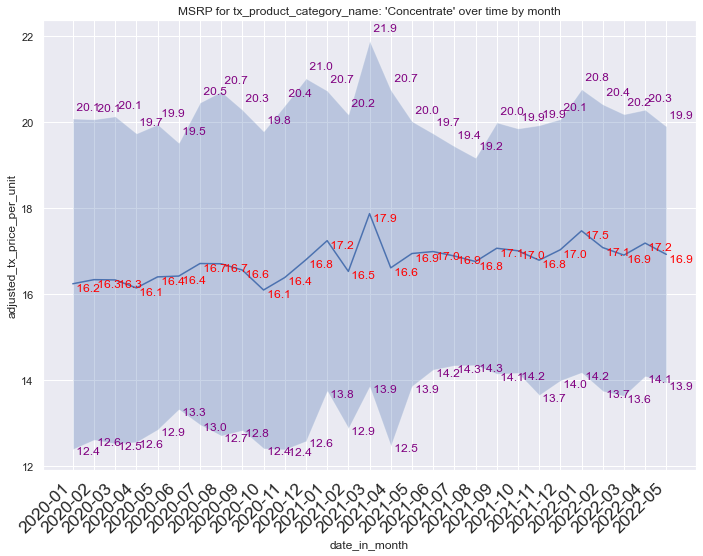

### % outliers for column category name Concentrate is 83.44% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim (by strain) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


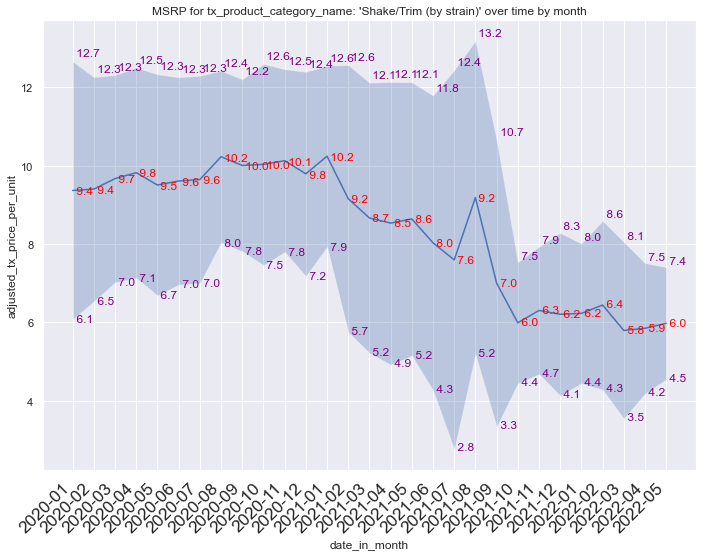

### % outliers for column category name Shake/Trim (by strain) is 27.950000000000003% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


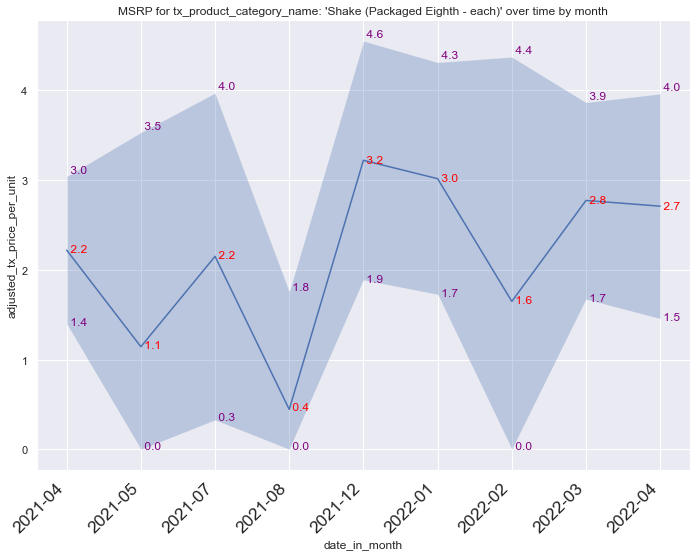

### % outliers for column category name Shake (Packaged Eighth - each) is 72.39999999999999% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Half Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


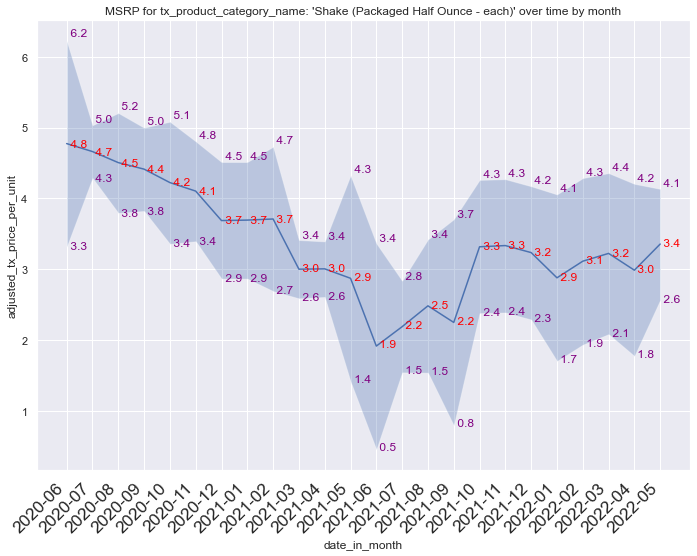

### % outliers for column category name Shake (Packaged Half Ounce - each) is 61.89% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 15.745647236941712 %


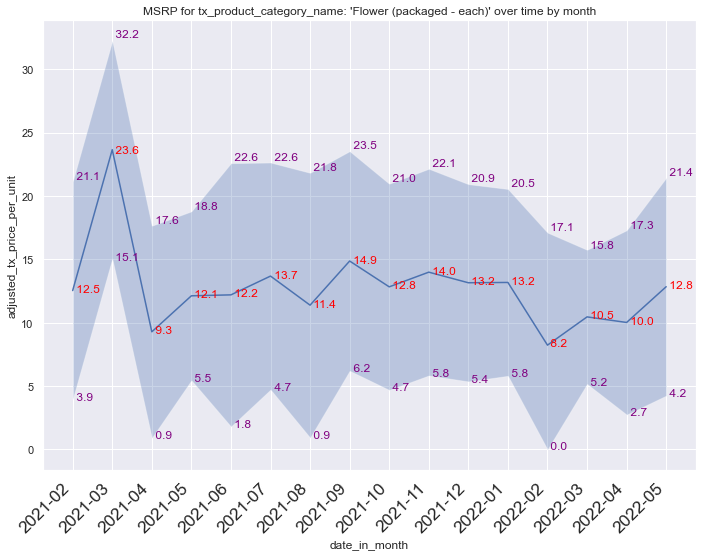

### % outliers for column category name Flower (packaged - each) is 44.019999999999996% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.125703564727955 %


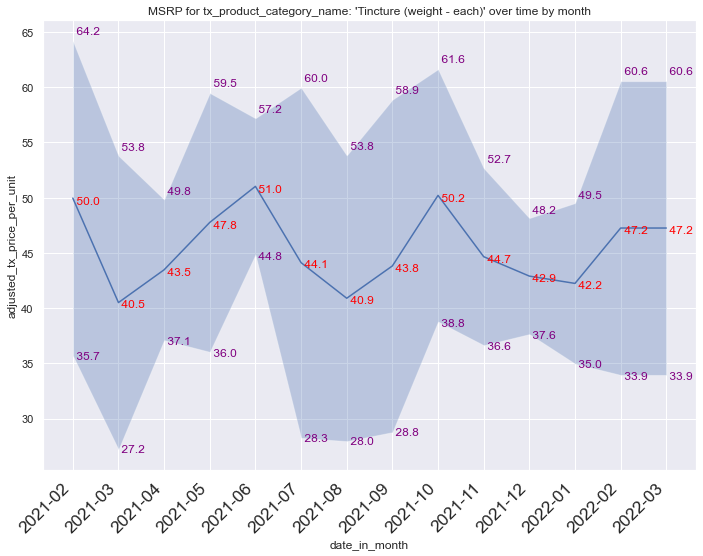

### % outliers for column category name Tincture (weight - each) is 78.97% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


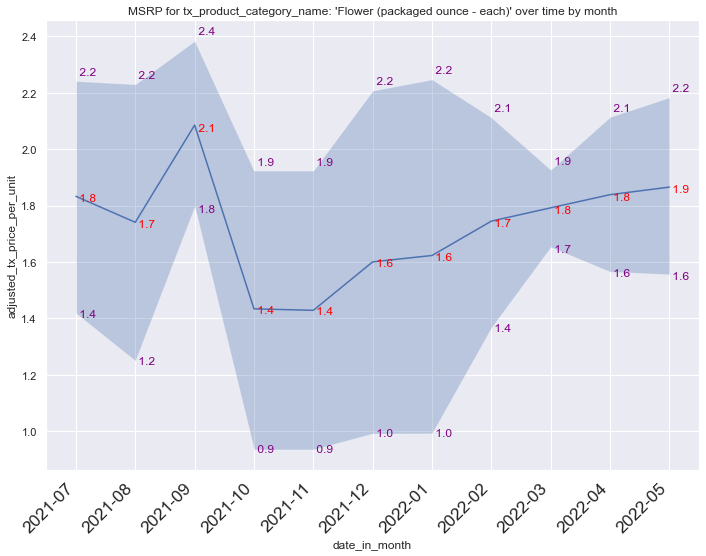

### % outliers for column category name Flower (packaged ounce - each) is 56.779999999999994% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


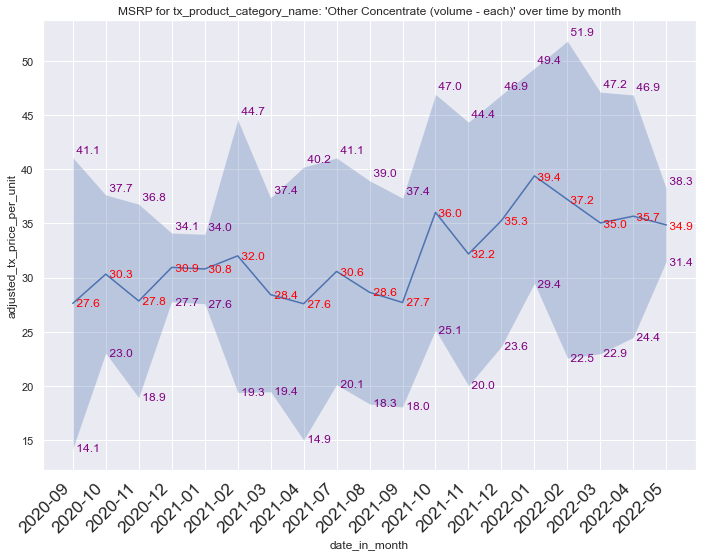

### % outliers for column category name Other Concentrate (volume - each) is 64.19% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


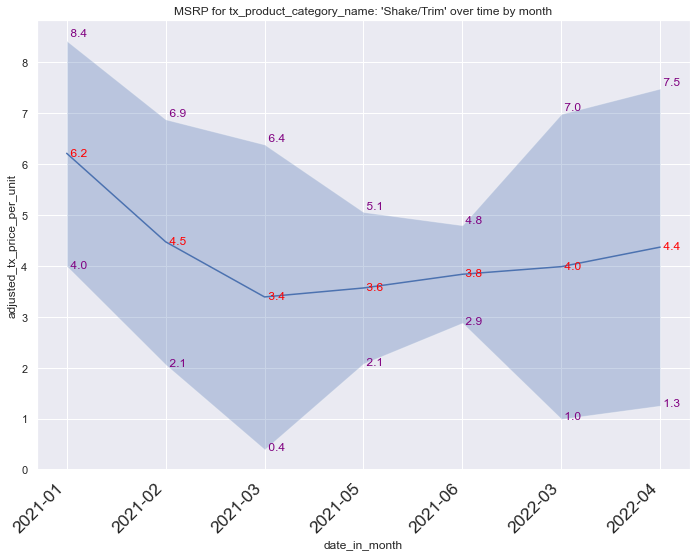

### % outliers for column category name Shake/Trim is 93.41000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


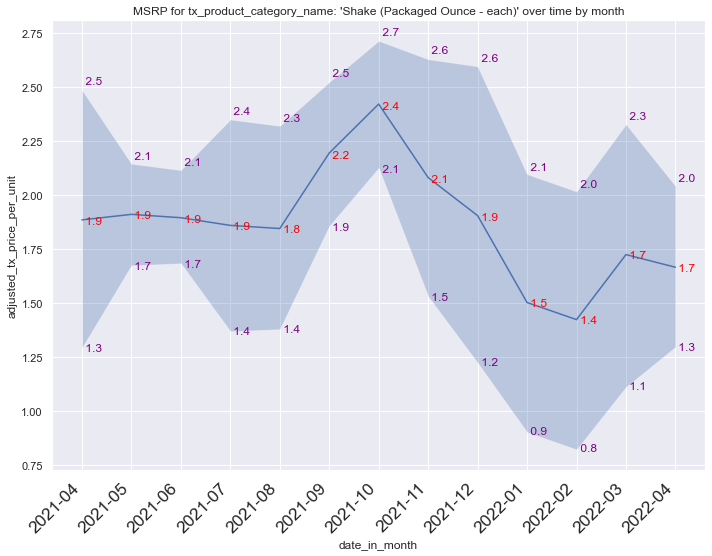

### % outliers for column category name Shake (Packaged Ounce - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


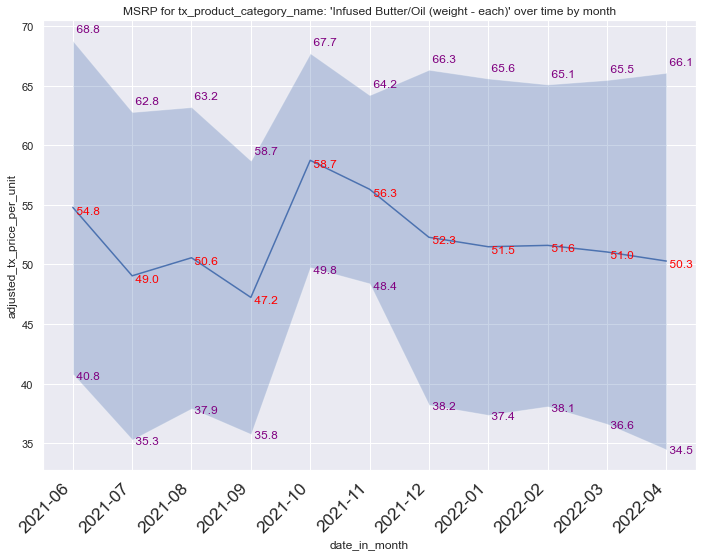

### % outliers for column category name Infused Butter/Oil (weight - each) is 33.33% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


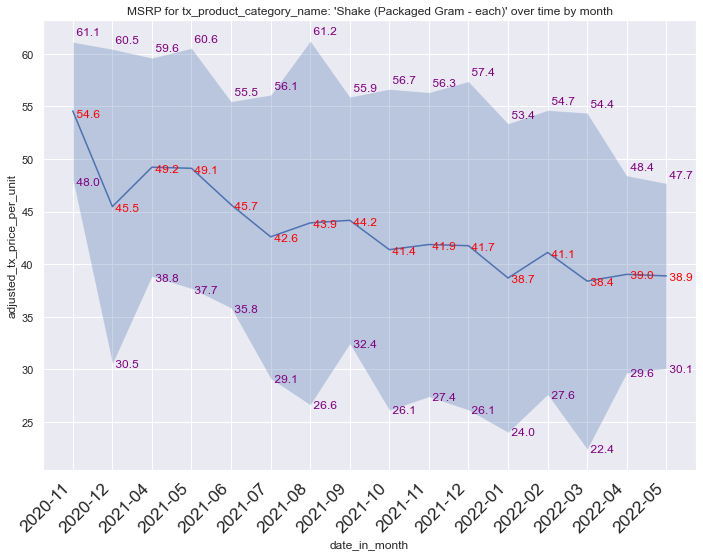

### % outliers for column category name Shake (Packaged Gram - each) is 44.07% ###
### Overall % outliers that are outside of time series band in column tx_product_category_name is 21.0% ###


In [74]:
mba_test.compare_entire_data_band('tx_product_category_name', 'S', 'std', use_unit_converted_price=True, ignore_non_unit_extractable_rows=False)

### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


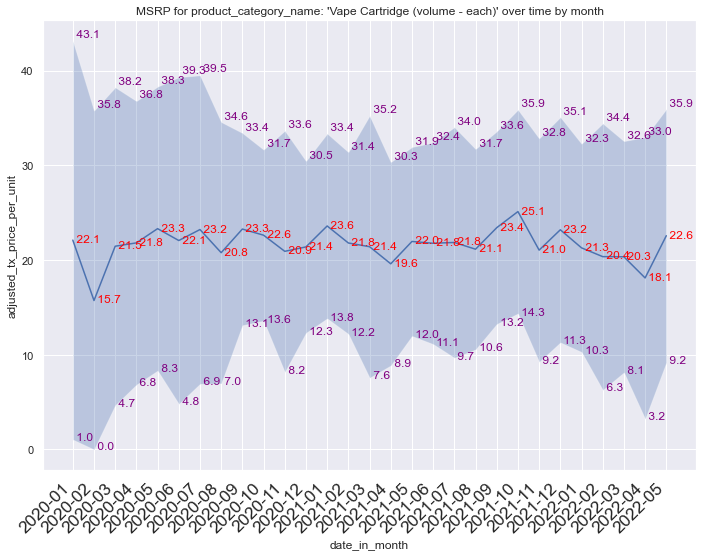

### % outliers for column category name Vape Cartridge (volume - each) is 8.540000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 11.842105263157894 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


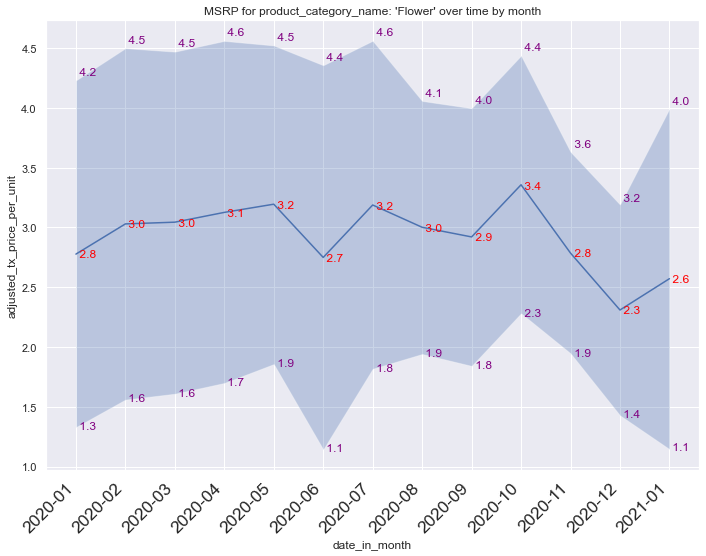

### % outliers for column category name Flower is 40.489999999999995% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.83488530547354 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


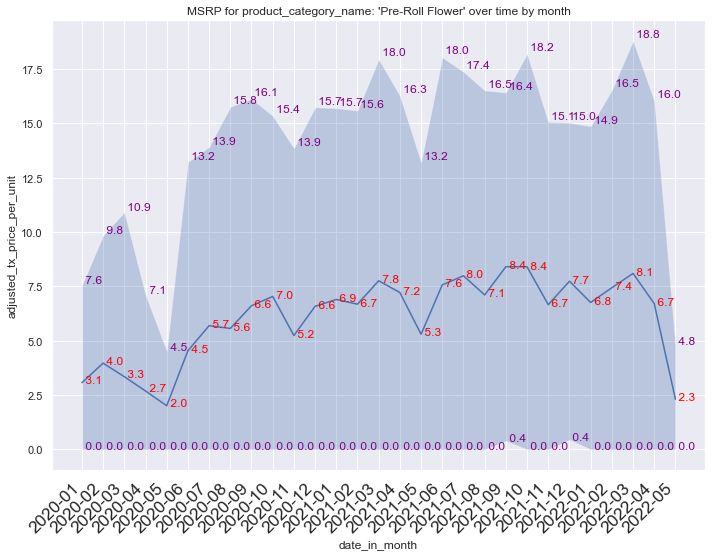

### % outliers for column category name Pre-Roll Flower is 22.91% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


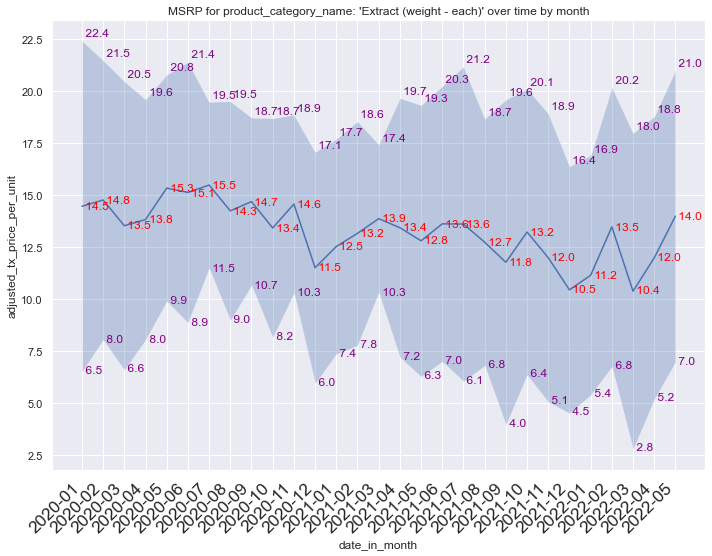

### % outliers for column category name Extract (weight - each) is 23.54% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.874713958810069 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.2860411899313501 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


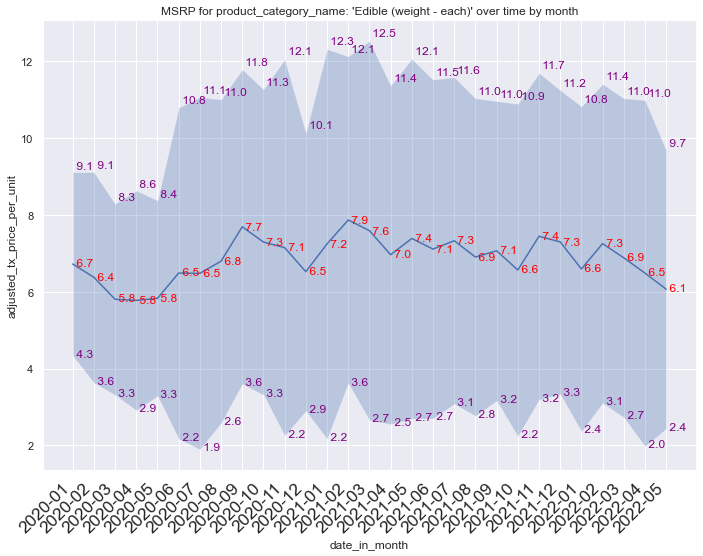

### % outliers for column category name Edible (weight - each) is 16.56% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


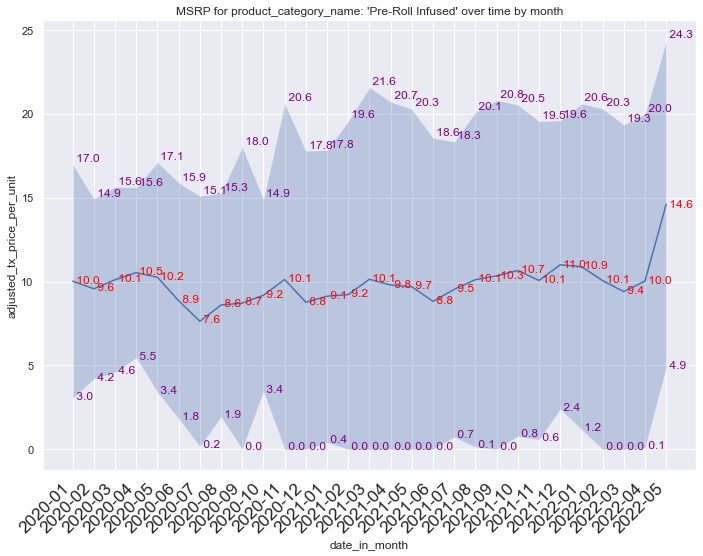

### % outliers for column category name Pre-Roll Infused is 6.12% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.948207171314741 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.745019920318725 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


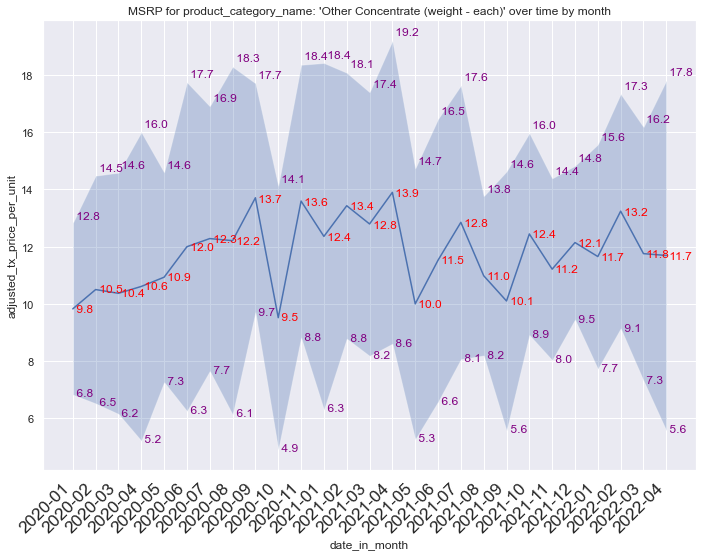

### % outliers for column category name Other Concentrate (weight - each) is 38.48% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0966183574879227 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


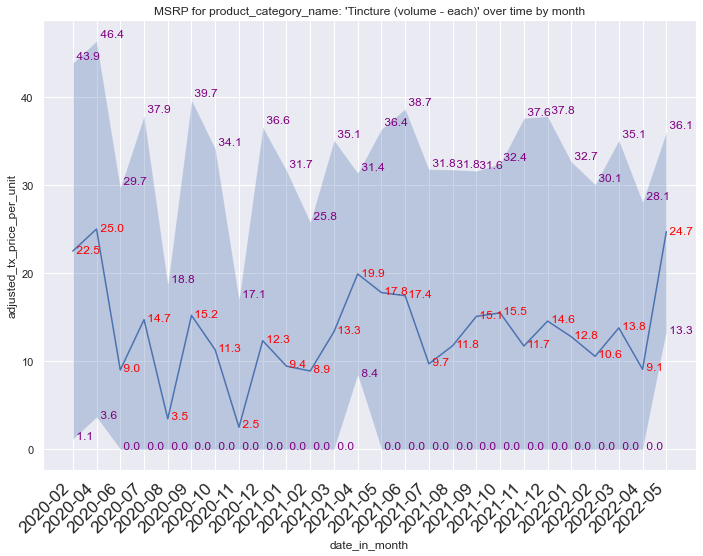

### % outliers for column category name Tincture (volume - each) is 13.4% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Capsule (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


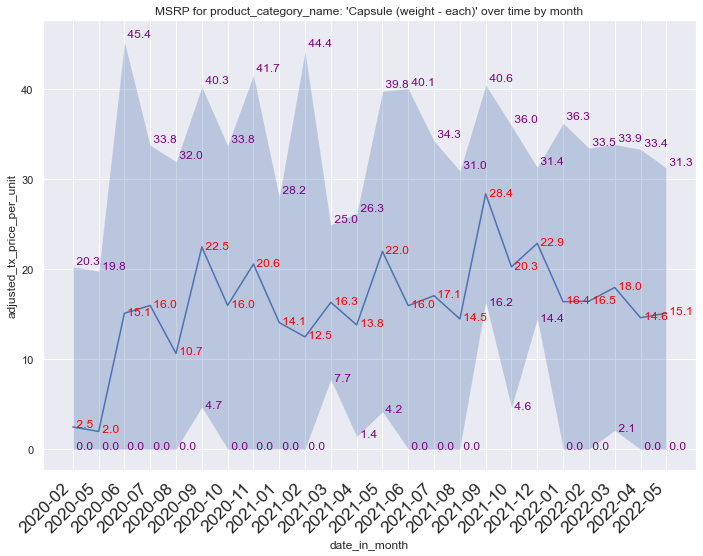

### % outliers for column category name Capsule (weight - each) is 29.630000000000003% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.9082652134423252 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


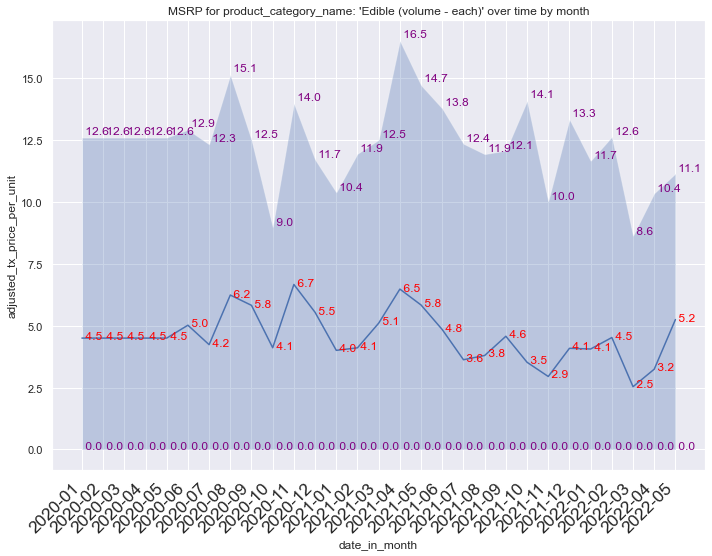

### % outliers for column category name Edible (volume - each) is 11.790000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.89873417721519 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


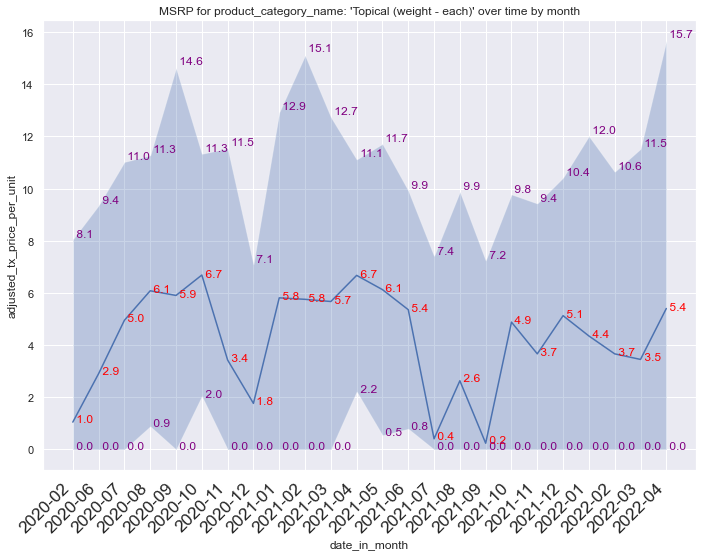

### % outliers for column category name Topical (weight - each) is 22.400000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


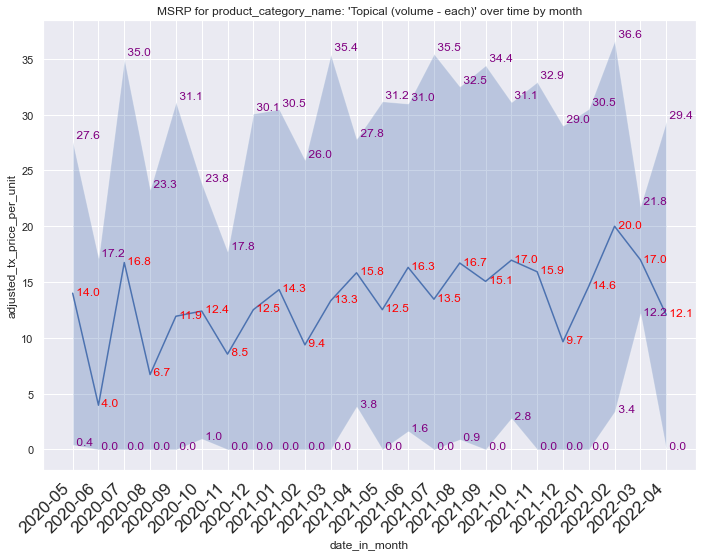

### % outliers for column category name Topical (volume - each) is 28.360000000000003% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


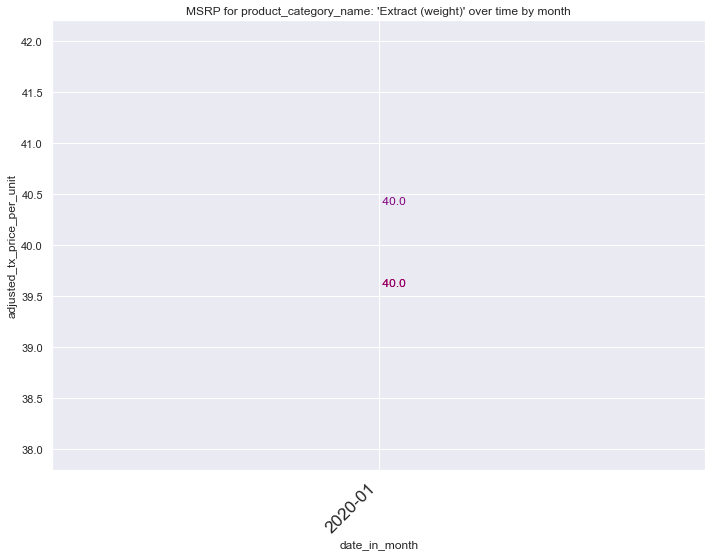

### % outliers for column category name Extract (weight) is 0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.14099953000156668 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


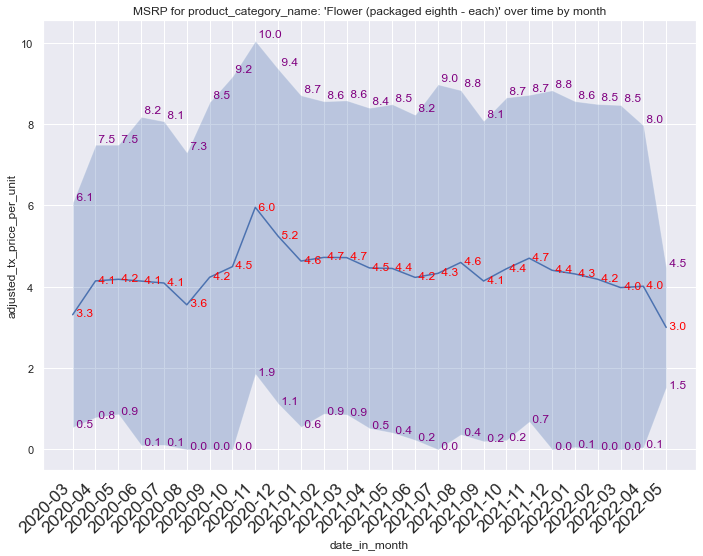

### % outliers for column category name Flower (packaged eighth - each) is 9.75% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Leaf ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.812316715542522 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.278592375366569 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


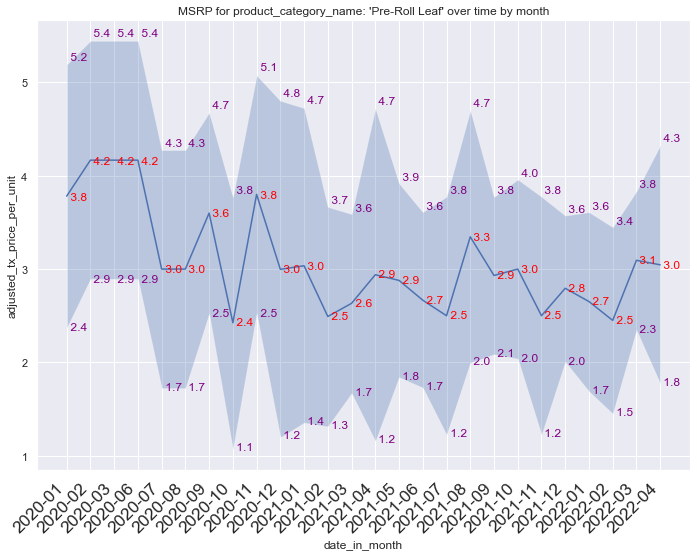

### % outliers for column category name Pre-Roll Leaf is 62.94% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


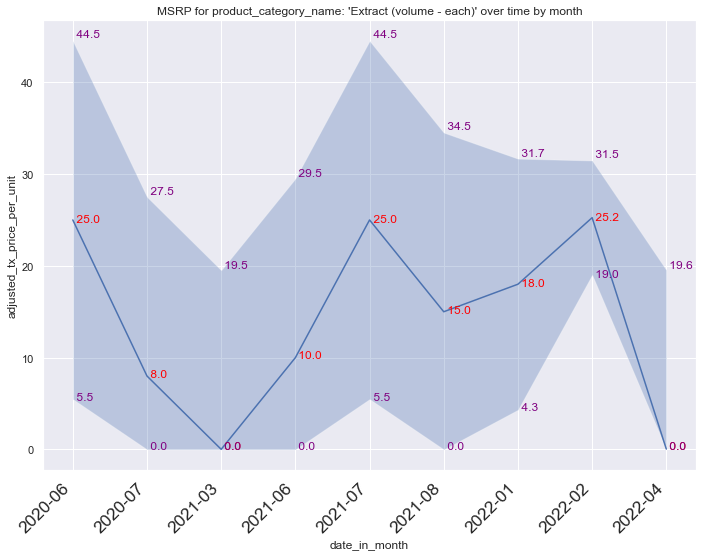

### % outliers for column category name Extract (volume - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Seeds (each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


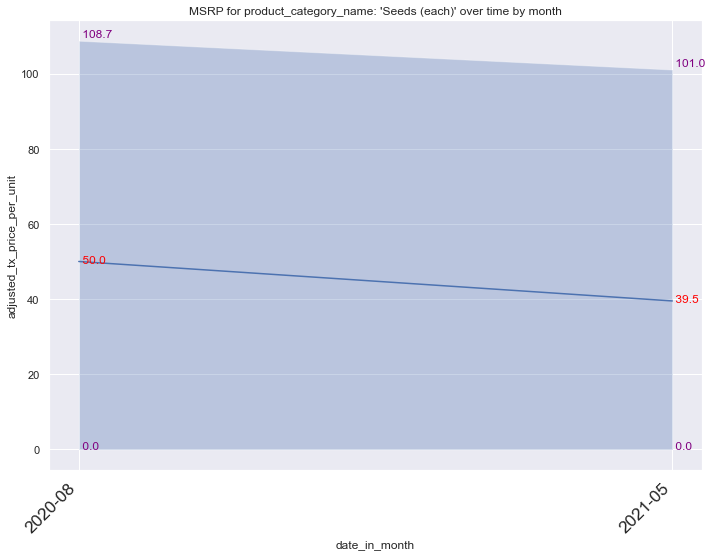

### % outliers for column category name Seeds (each) is 0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.0514439008994794 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.5546788701278205 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


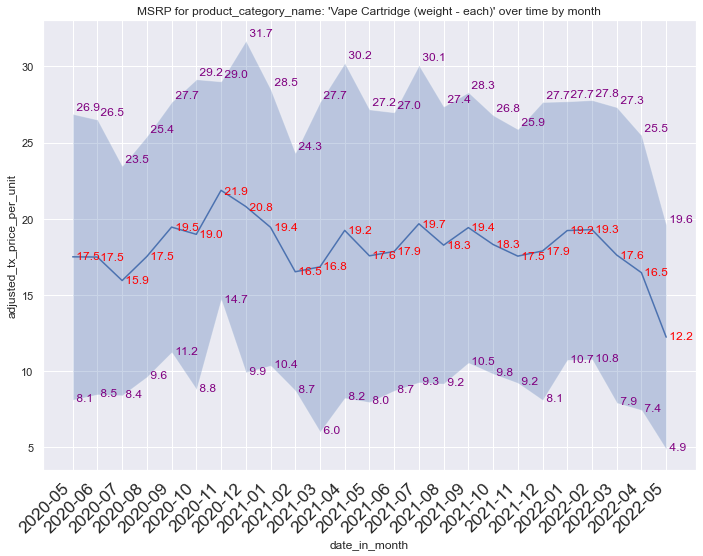

### % outliers for column category name Vape Cartridge (weight - each) is 21.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged quarter - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.4010507880910683 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


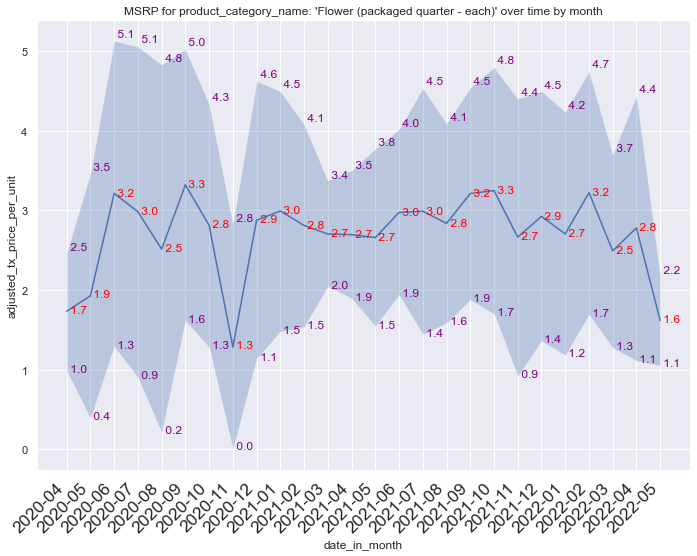

### % outliers for column category name Flower (packaged quarter - each) is 30.130000000000003% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


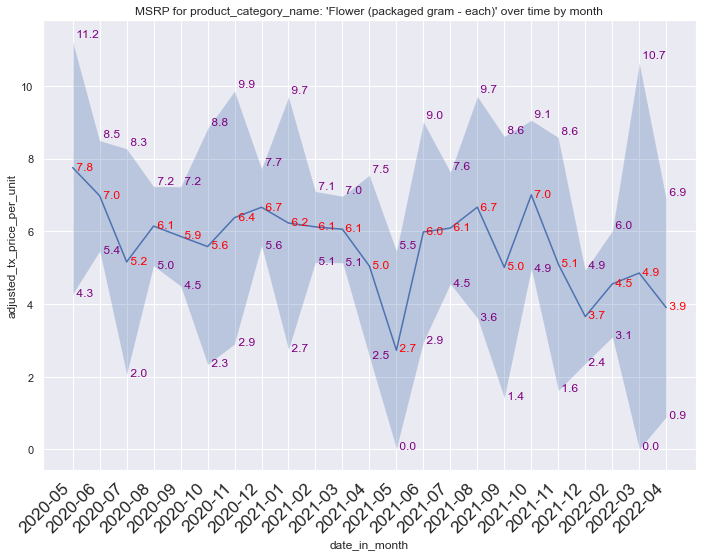

### % outliers for column category name Flower (packaged gram - each) is 40.52% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.4890190336749636 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.856515373352855 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


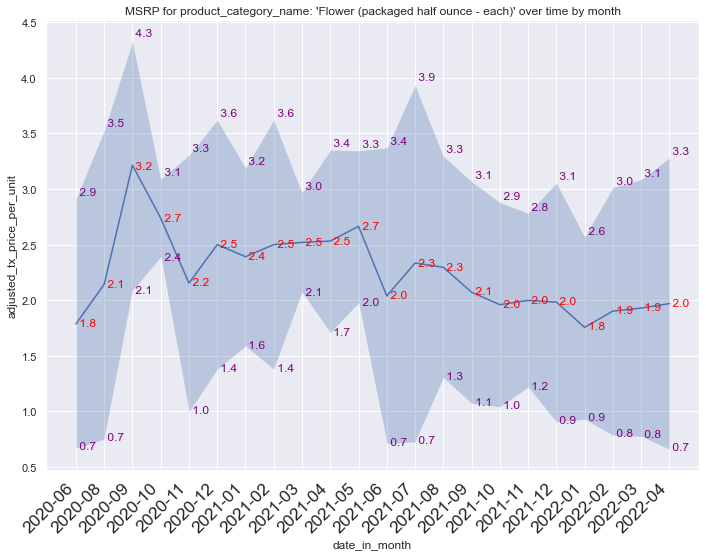

### % outliers for column category name Flower (packaged half ounce - each) is 47.349999999999994% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 6.848030018761726 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.864915572232645 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


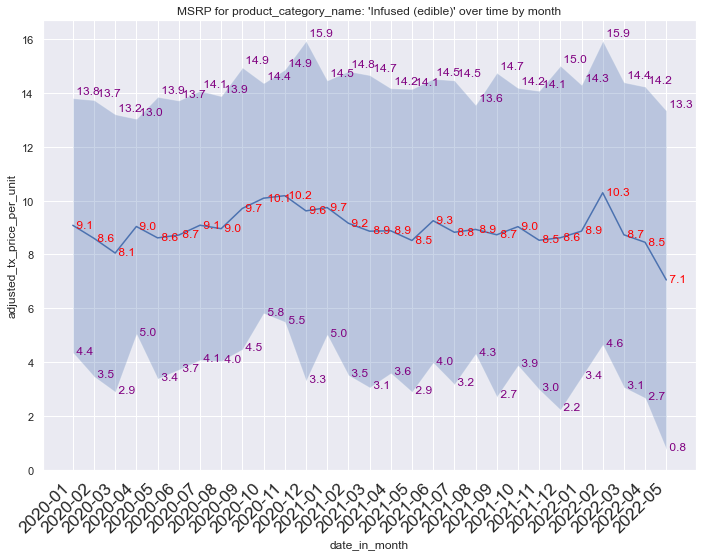

### % outliers for column category name Infused (edible) is 33.019999999999996% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (non-edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


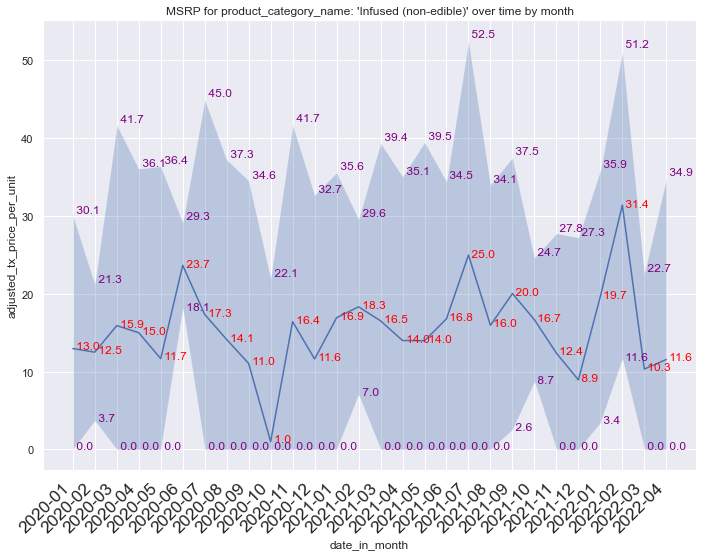

### % outliers for column category name Infused (non-edible) is 13.600000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


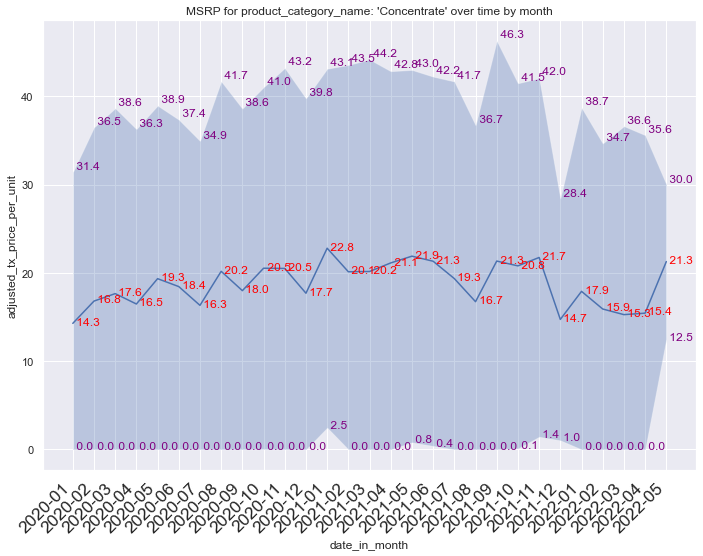

### % outliers for column category name Concentrate is 3.66% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate (Each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 5.149564558879213 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.3286633850814087 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


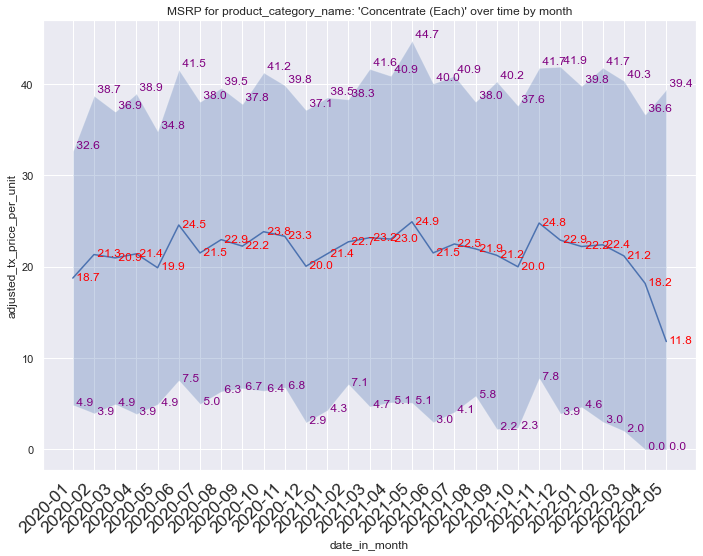

### % outliers for column category name Concentrate (Each) is 49.370000000000005% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


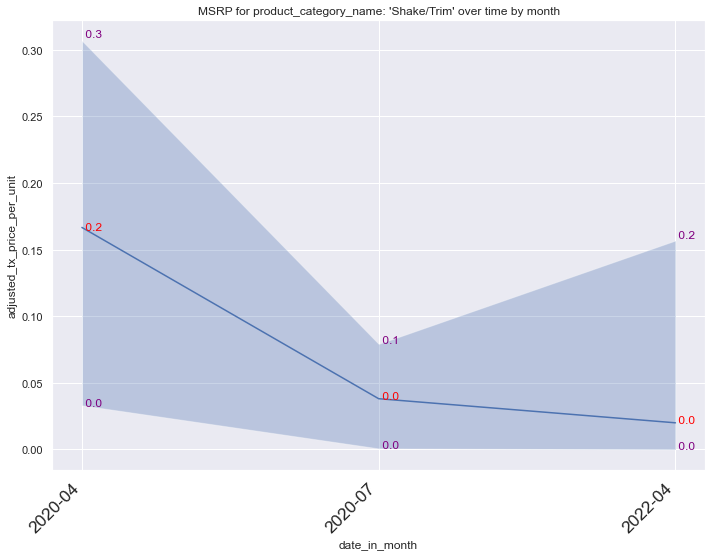

### % outliers for column category name Shake/Trim is 0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Half Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


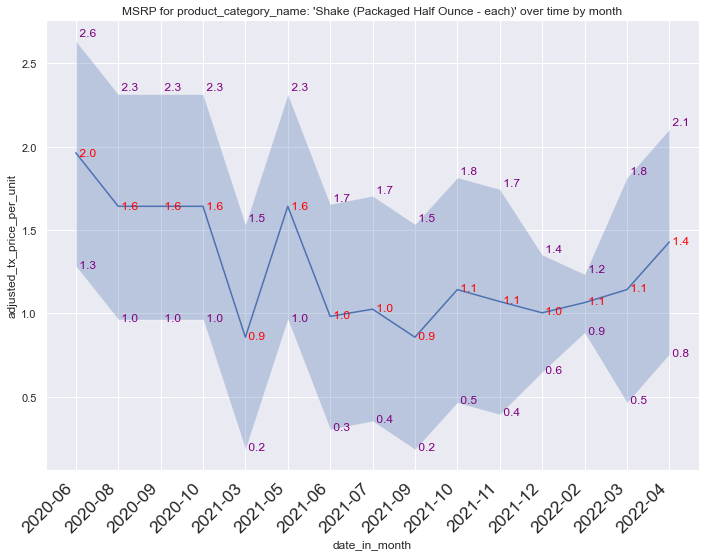

### % outliers for column category name Shake (Packaged Half Ounce - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 14.880952380952381 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


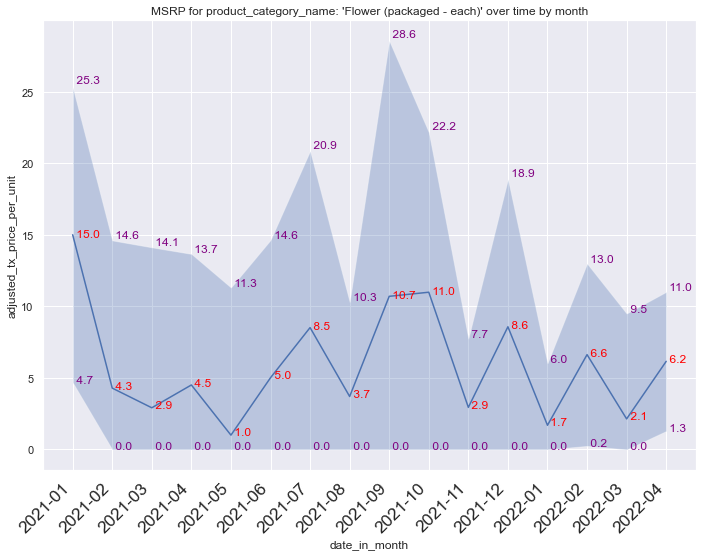

### % outliers for column category name Flower (packaged - each) is 30.61% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 20.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


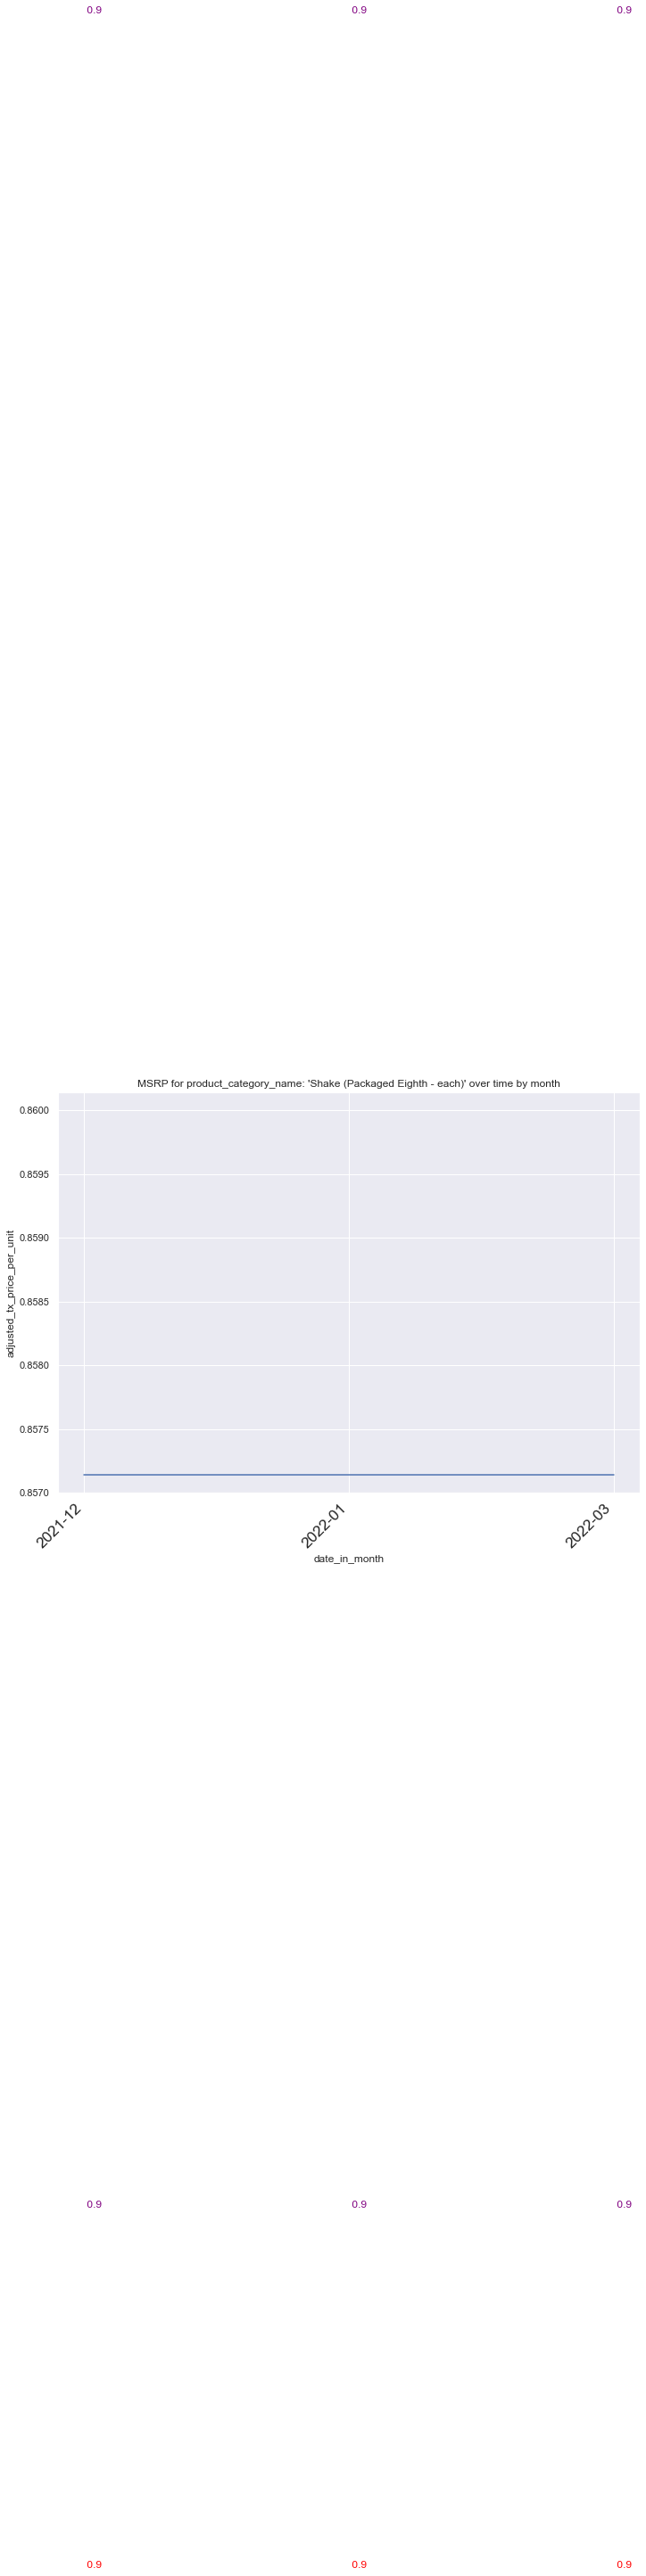

### % outliers for column category name Shake (Packaged Eighth - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


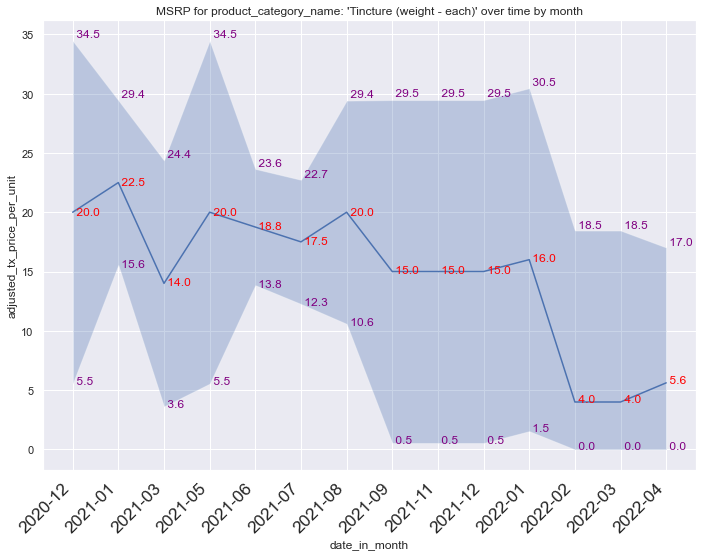

### % outliers for column category name Tincture (weight - each) is 48.72% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


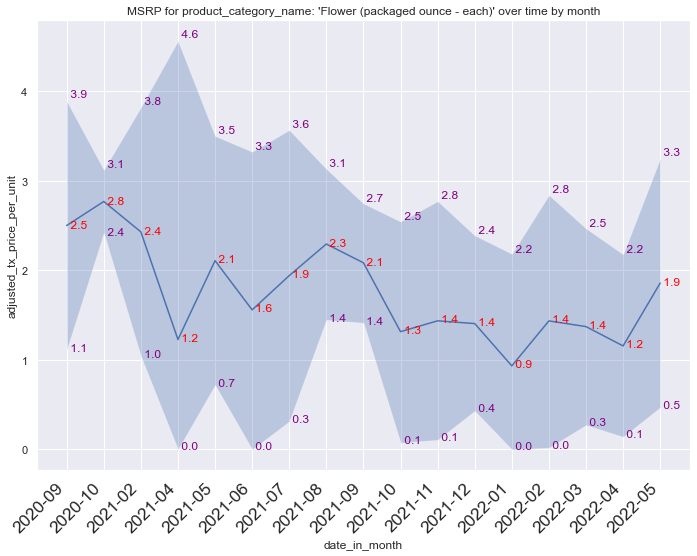

### % outliers for column category name Flower (packaged ounce - each) is 20.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Buds ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


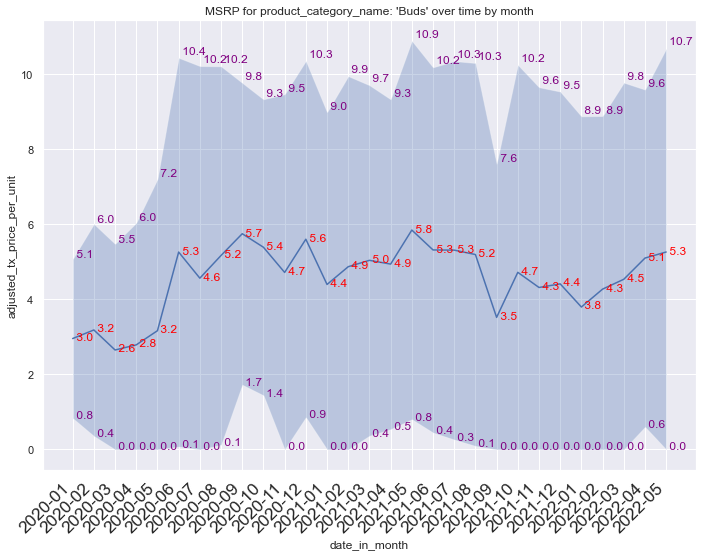

### % outliers for column category name Buds is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 25.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.3888888888888888 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


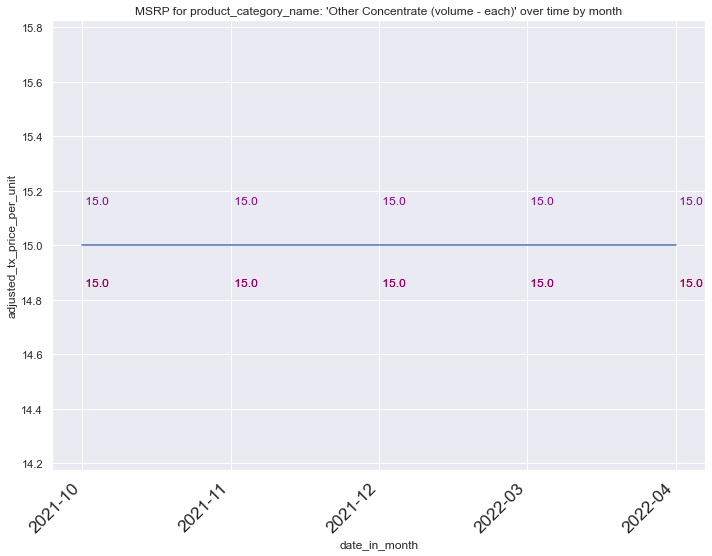

### % outliers for column category name Other Concentrate (volume - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim (by strain) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.5968063872255487 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


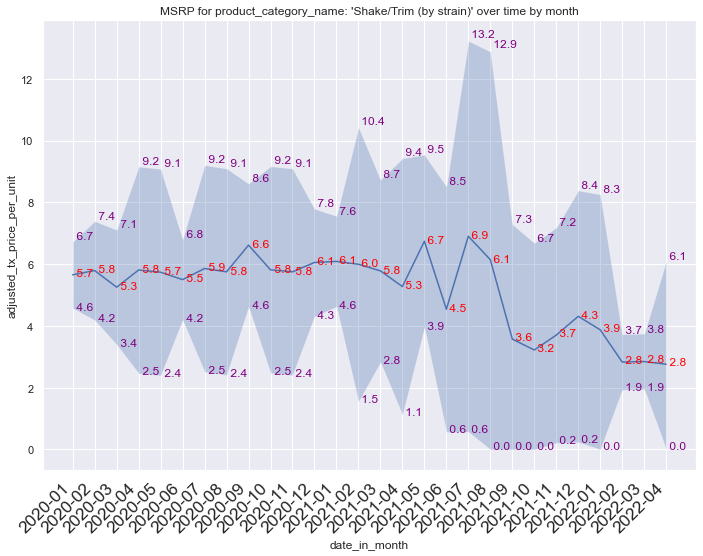

### % outliers for column category name Shake/Trim (by strain) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 9.090909090909092 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


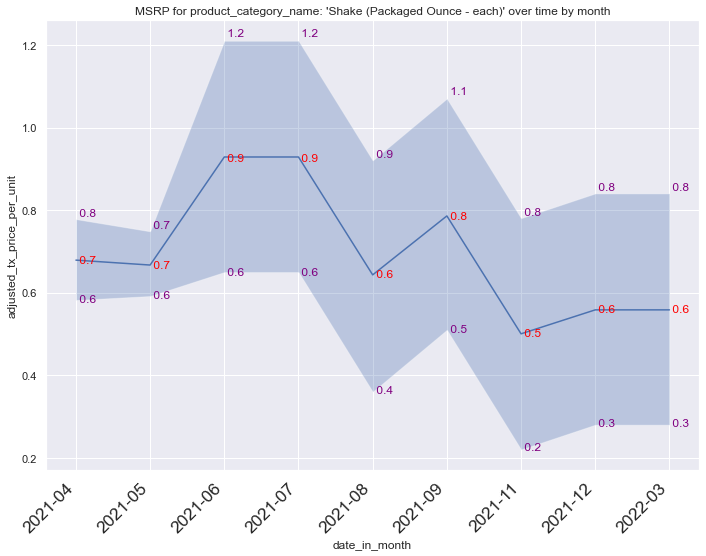

### % outliers for column category name Shake (Packaged Ounce - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


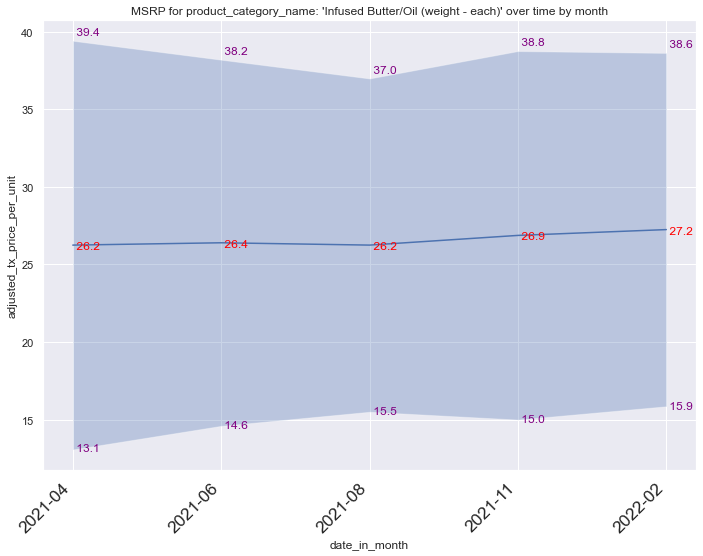

### % outliers for column category name Infused Butter/Oil (weight - each) is 0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


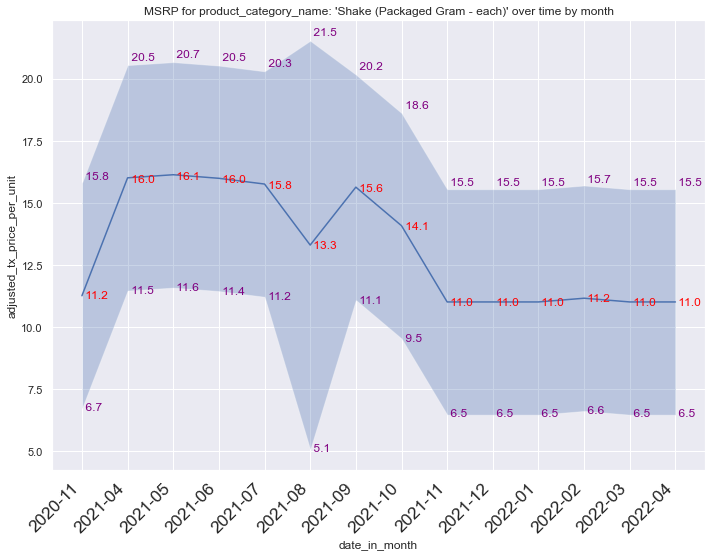

### % outliers for column category name Shake (Packaged Gram - each) is 0.0% ###
### Overall % outliers that are outside of time series band in column product_category_name is 18.8% ###


In [72]:
mba_test.compare_entire_data_band('product_category_name', 'C', 'std', use_unit_converted_price=True, ignore_non_unit_extractable_rows=False)

### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.0889021479713605 %


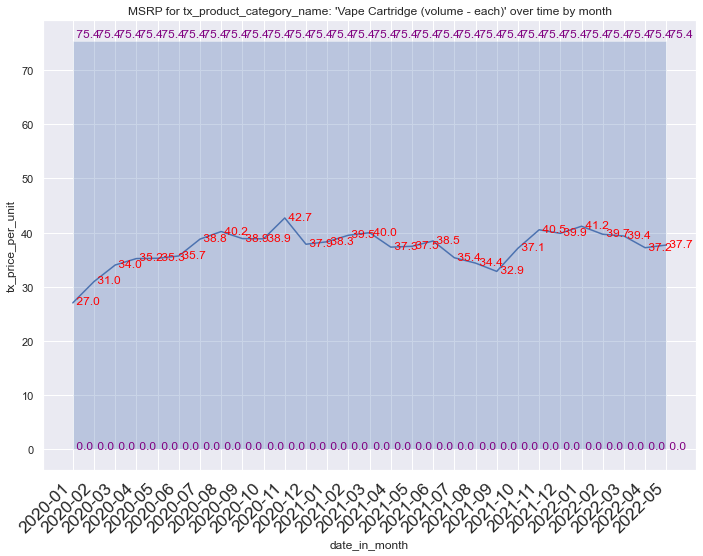

### % outliers for column category name Vape Cartridge (volume - each) is 1.1400000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.557986947265557 %


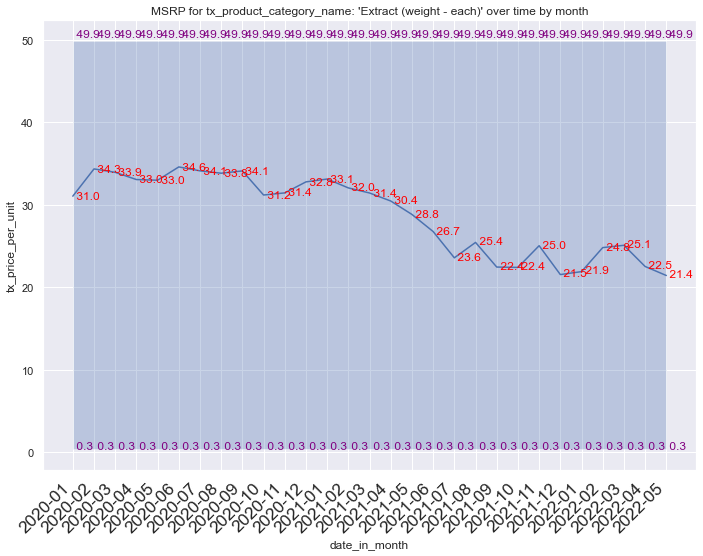

### % outliers for column category name Extract (weight - each) is 6.569999999999999% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.065228826933193 %


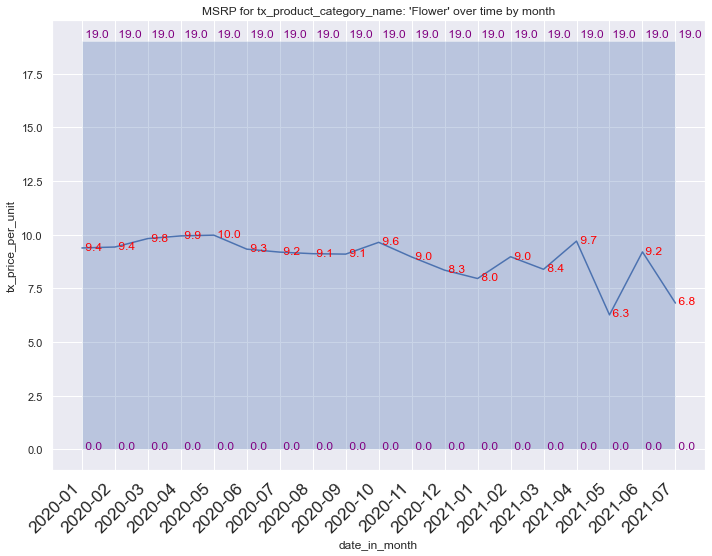

### % outliers for column category name Flower is 2.83% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.926801244081697 %


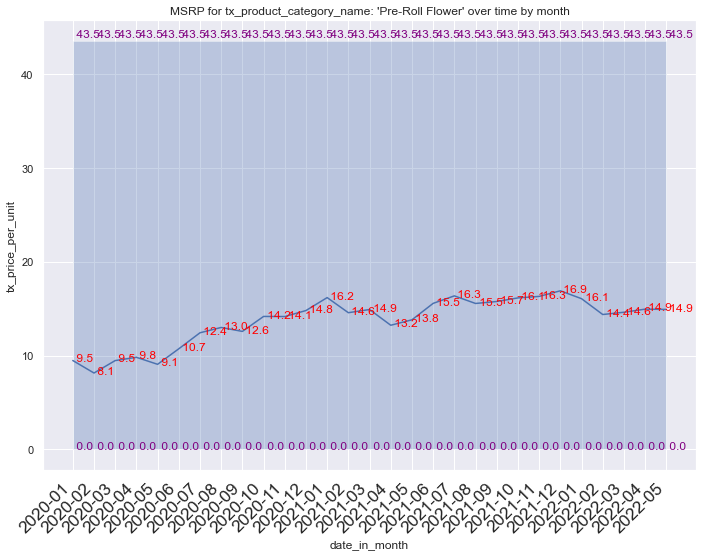

### % outliers for column category name Pre-Roll Flower is 5.949999999999999% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.980939516734204 %


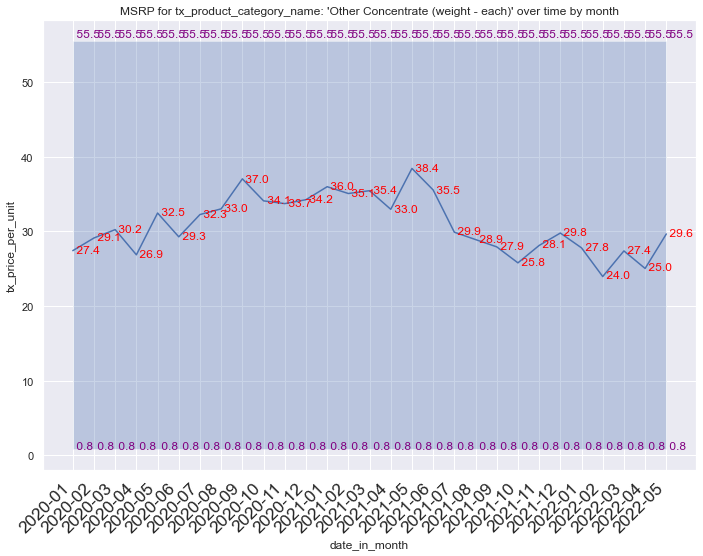

### % outliers for column category name Other Concentrate (weight - each) is 12.740000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.0137641143987473 %


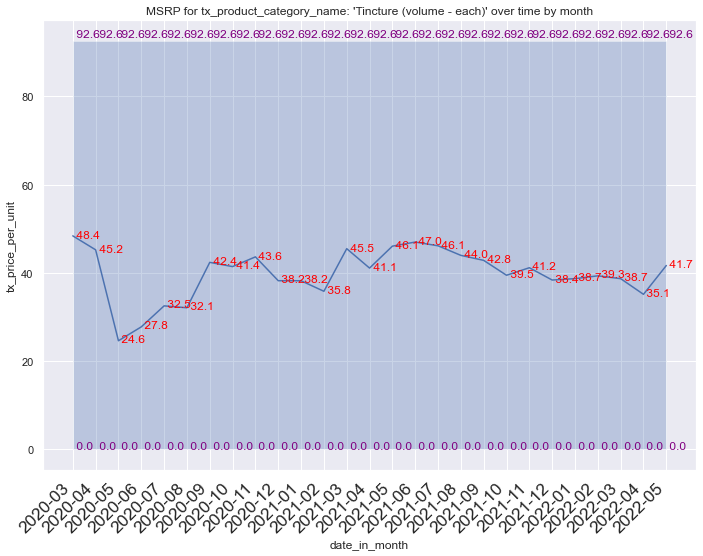

### % outliers for column category name Tincture (volume - each) is 3.25% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.25969402658098434 %


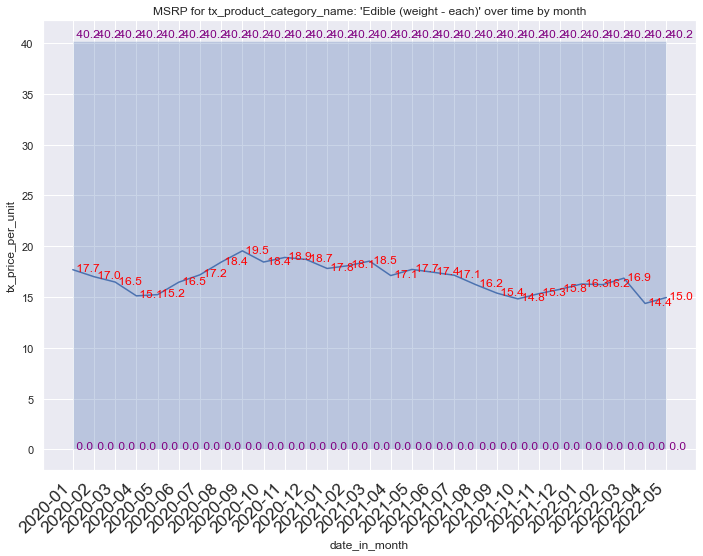

### % outliers for column category name Edible (weight - each) is 0.91% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.7675217871609181 %


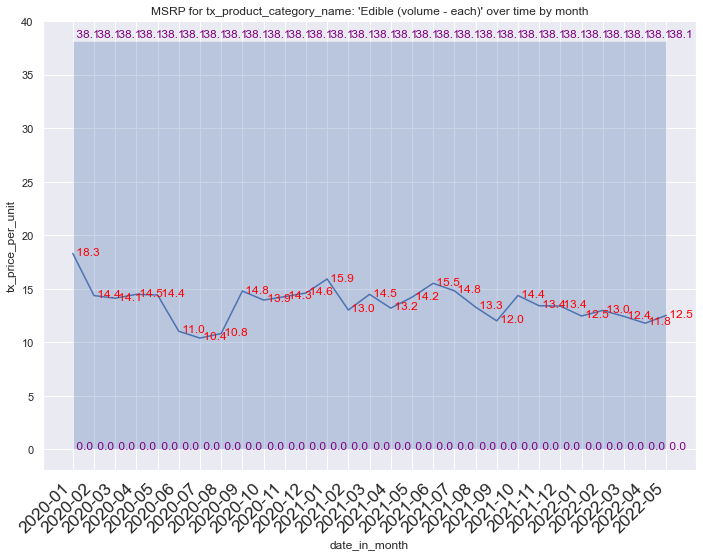

### % outliers for column category name Edible (volume - each) is 3.37% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.3815809956723435 %


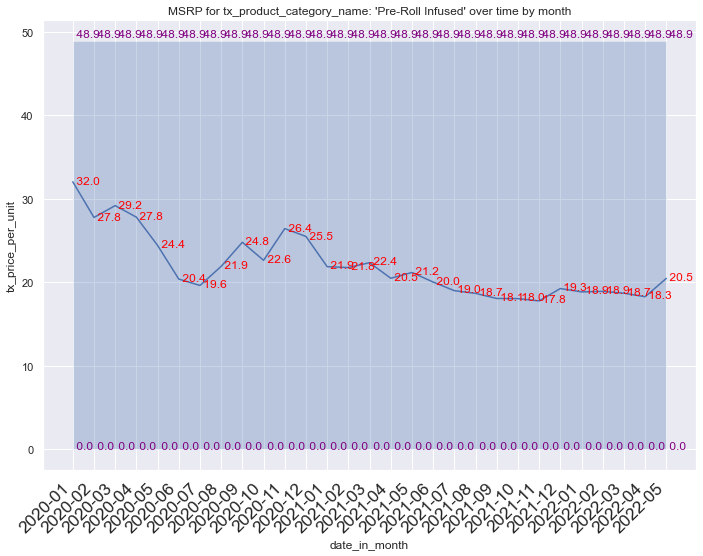

### % outliers for column category name Pre-Roll Infused is 4.16% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.0678167757287325 %


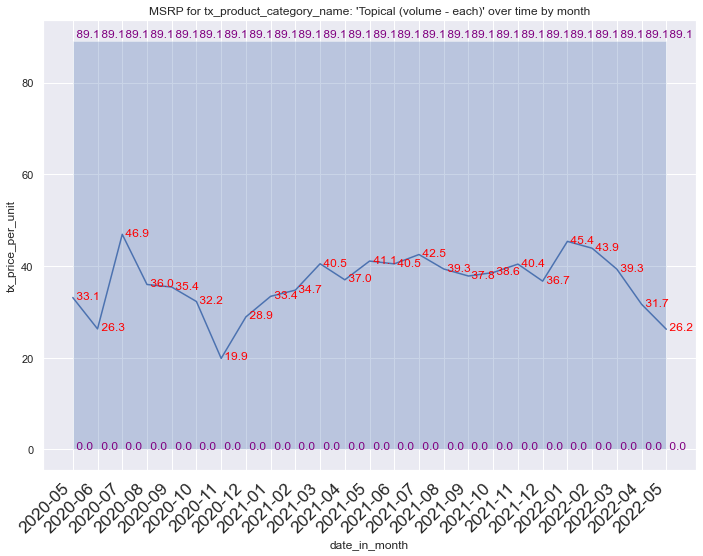

### % outliers for column category name Topical (volume - each) is 11.55% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.909694555112882 %


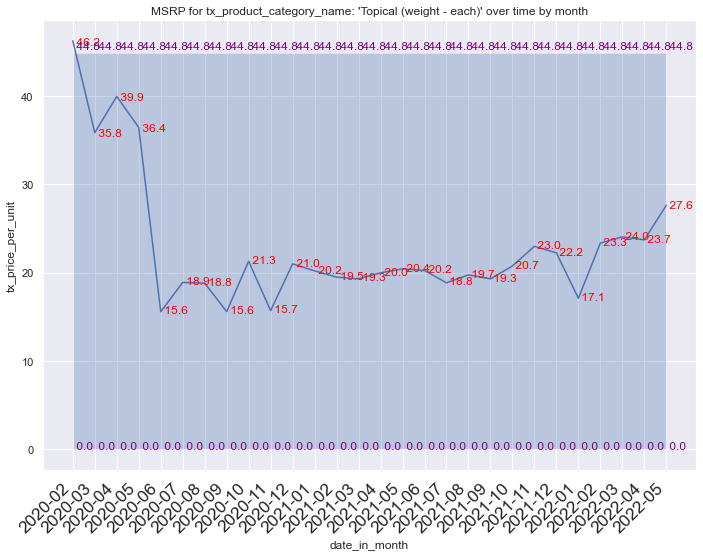

### % outliers for column category name Topical (weight - each) is 15.75% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Capsule (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.5823627287853578 %


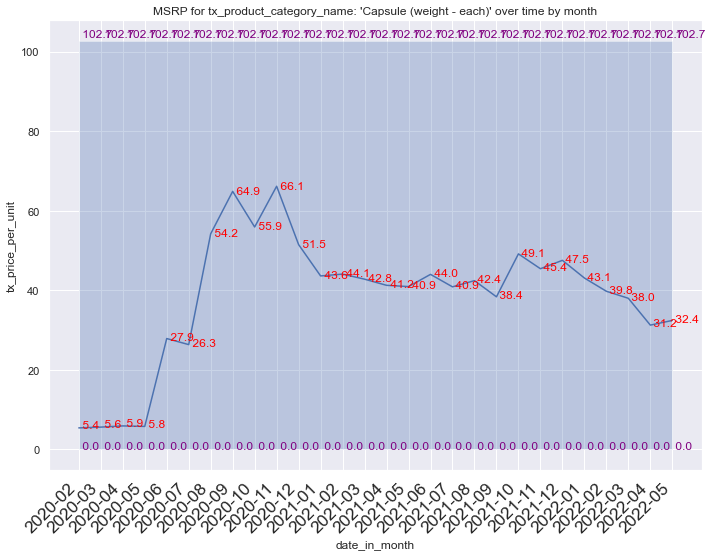

### % outliers for column category name Capsule (weight - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 9.090909090909092 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


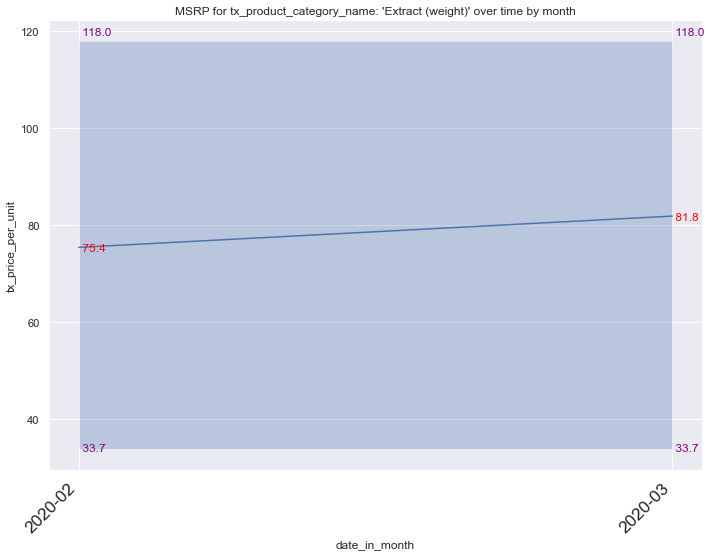

### % outliers for column category name Extract (weight) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.5101938896590851 %


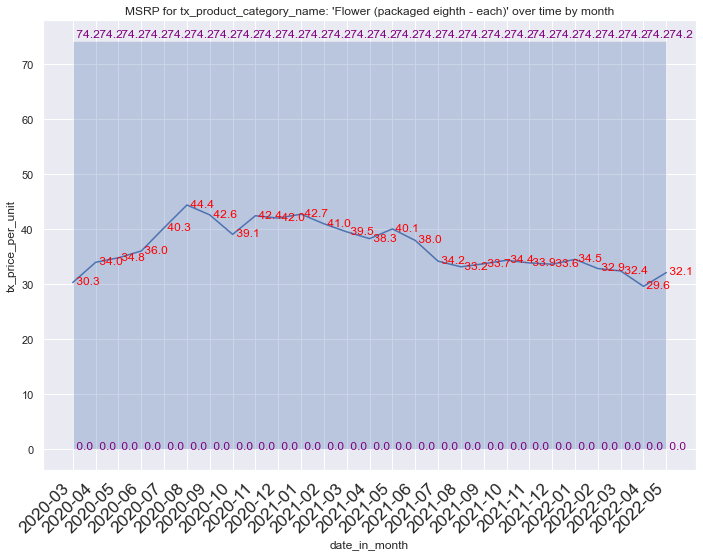

### % outliers for column category name Flower (packaged eighth - each) is 1.92% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Leaf ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.338469247150194 %


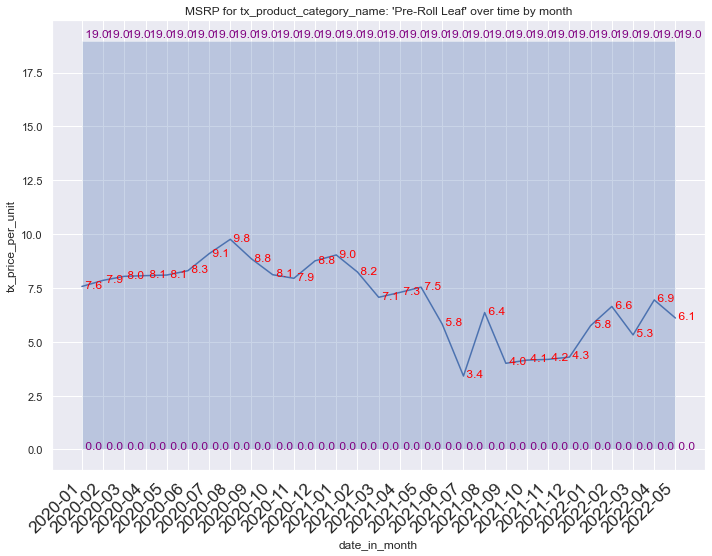

### % outliers for column category name Pre-Roll Leaf is 9.180000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.443298969072165 %


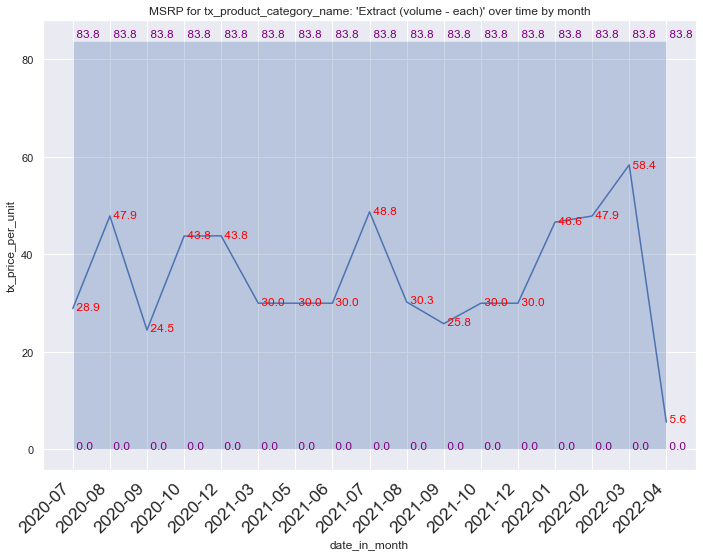

### % outliers for column category name Extract (volume - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.2950436831460206 %


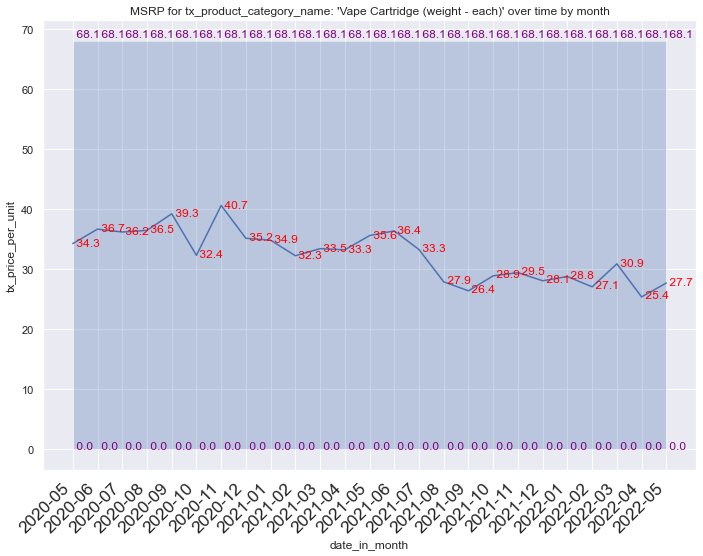

### % outliers for column category name Vape Cartridge (weight - each) is 0.53% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Seeds (each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


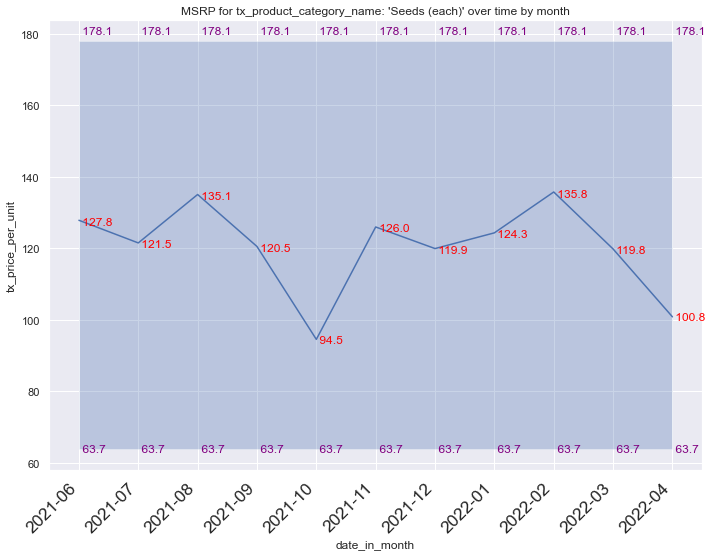

### % outliers for column category name Seeds (each) is 36.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged quarter - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.7792873622148166 %


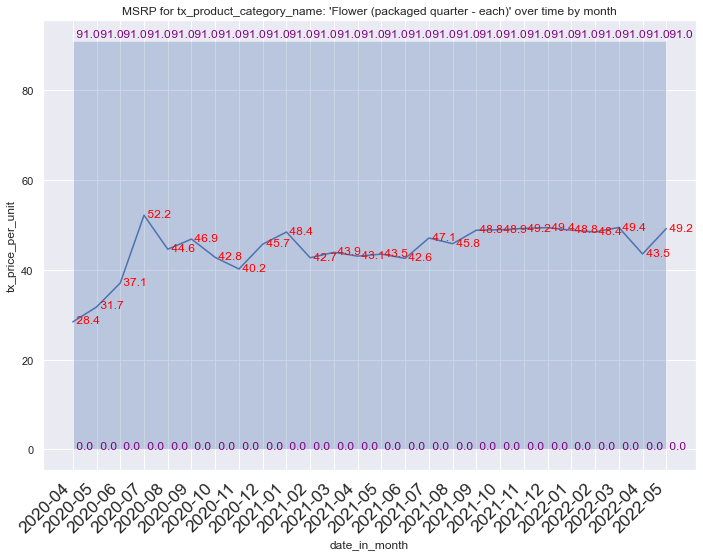

### % outliers for column category name Flower (packaged quarter - each) is 11.57% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 9.953533871362191 %


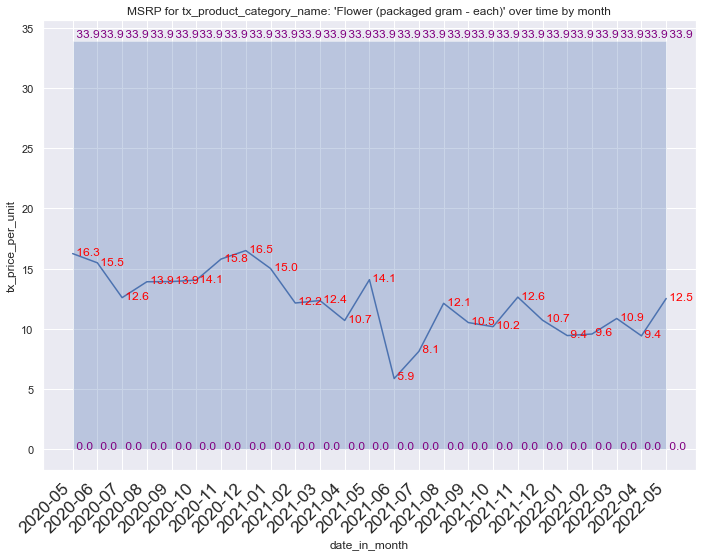

### % outliers for column category name Flower (packaged gram - each) is 3.7600000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.8869495166487646 %


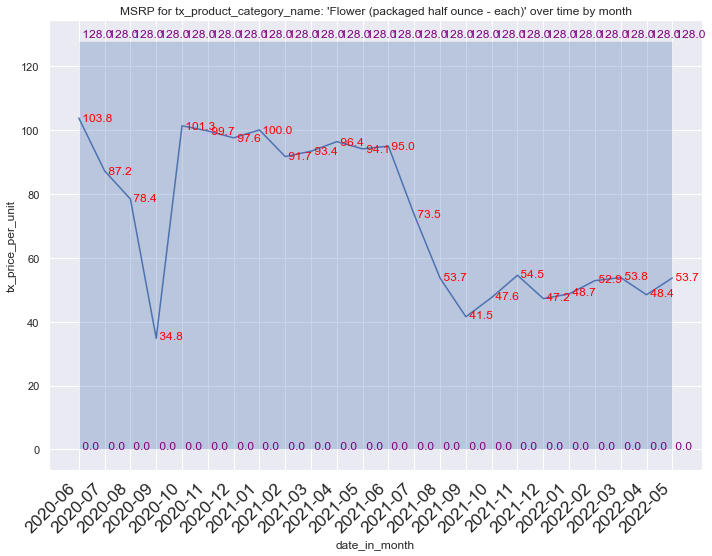

### % outliers for column category name Flower (packaged half ounce - each) is 27.36% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.7726798984955594 %


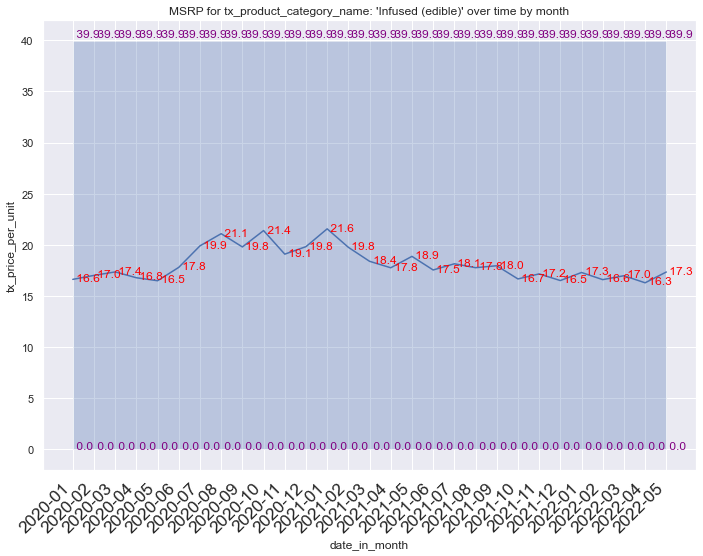

### % outliers for column category name Infused (edible) is 2.22% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Buds ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.5339281261256269 %


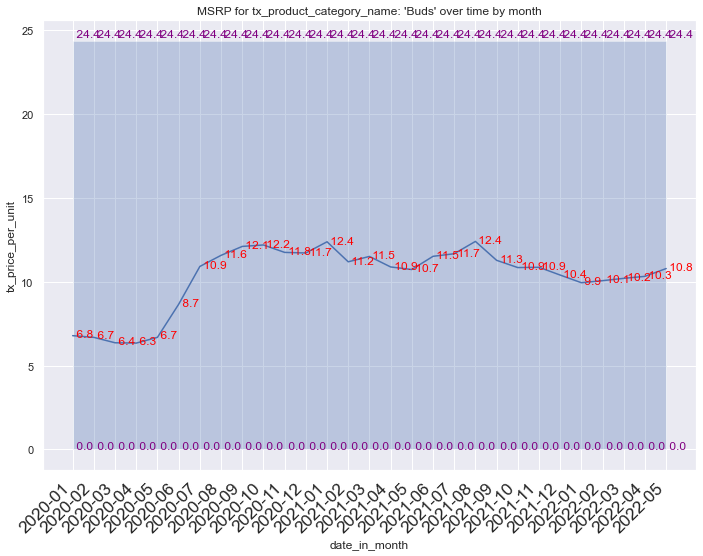

### % outliers for column category name Buds is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Bud allocated for extraction ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate (Each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.0242051693632235 %


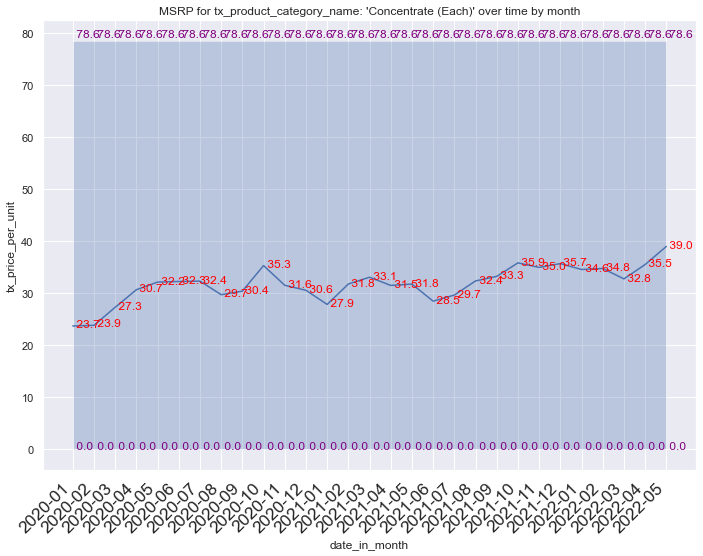

### % outliers for column category name Concentrate (Each) is 1.6400000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (non-edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.074605451936873 %


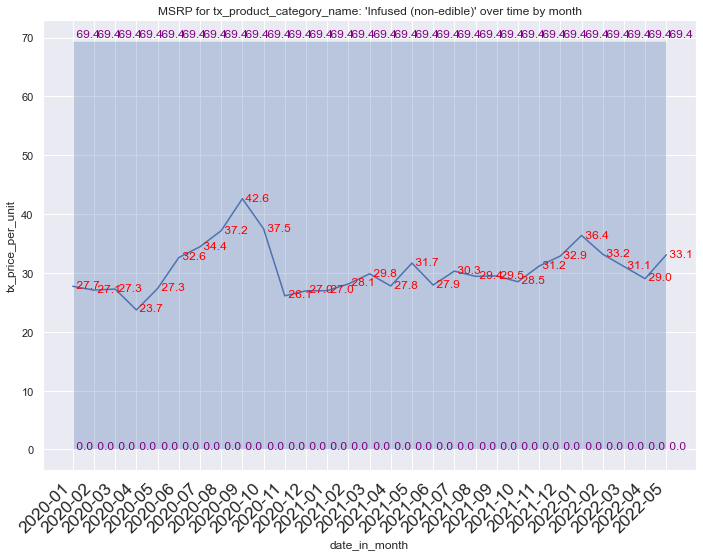

### % outliers for column category name Infused (non-edible) is 4.47% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.618199000945052 %


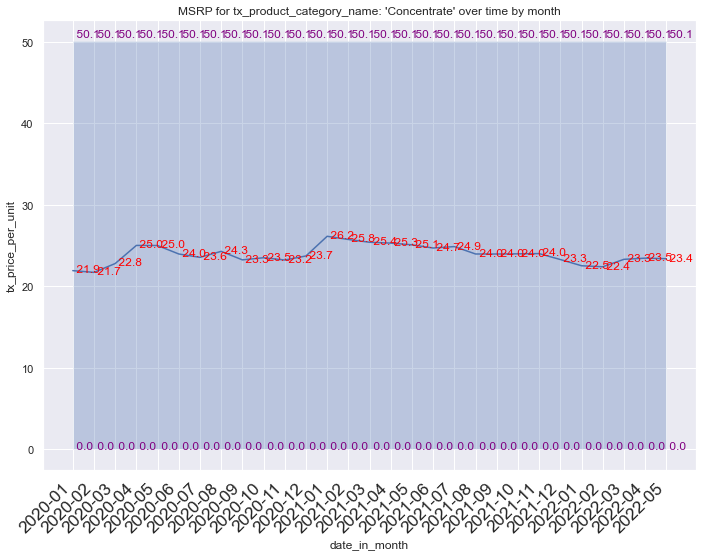

### % outliers for column category name Concentrate is 13.850000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim (by strain) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.465201465201465 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.753680281982168 %


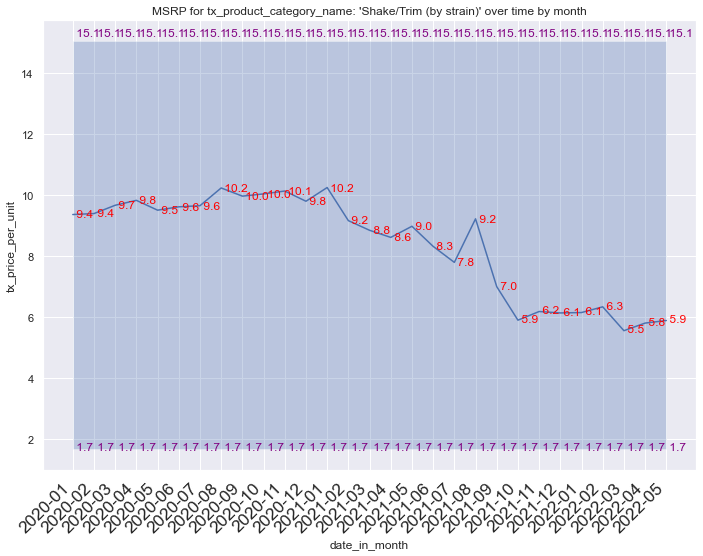

### % outliers for column category name Shake/Trim (by strain) is 0.53% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.5295109612141653 %


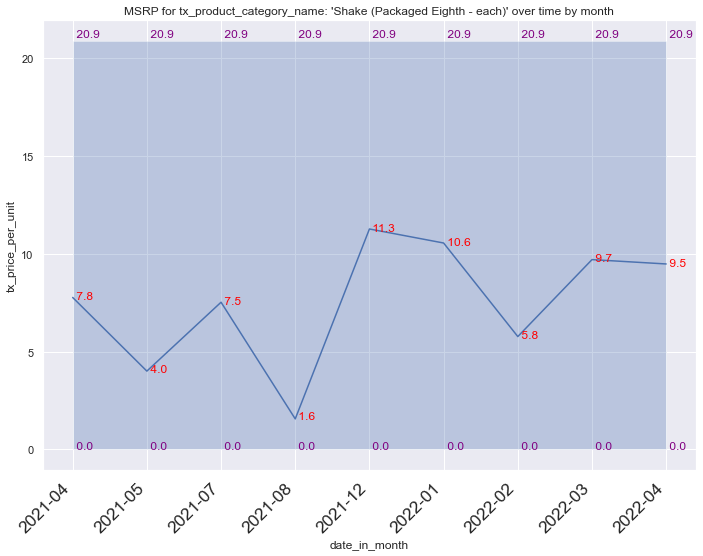

### % outliers for column category name Shake (Packaged Eighth - each) is 59.330000000000005% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Half Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.342366757000903 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.122854561878952 %


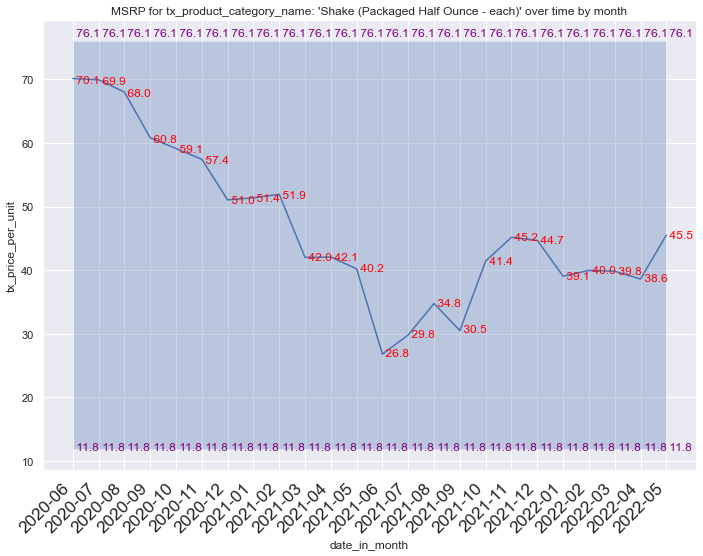

### % outliers for column category name Shake (Packaged Half Ounce - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.8358340688437775 %


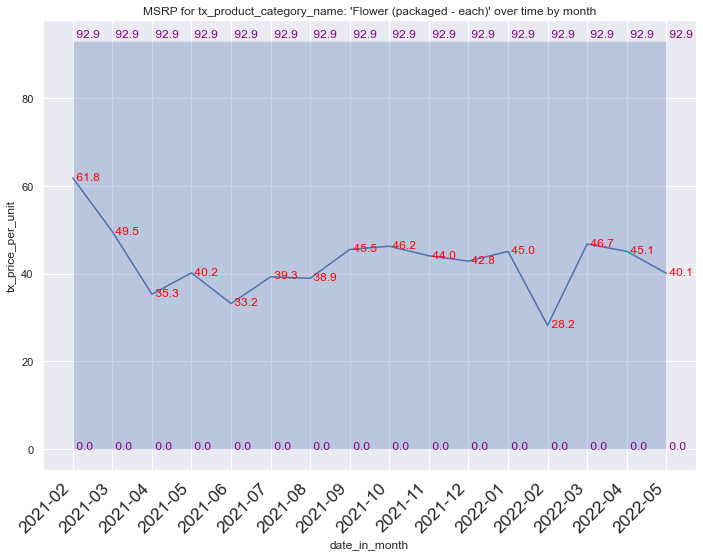

### % outliers for column category name Flower (packaged - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.6548672566371683 %


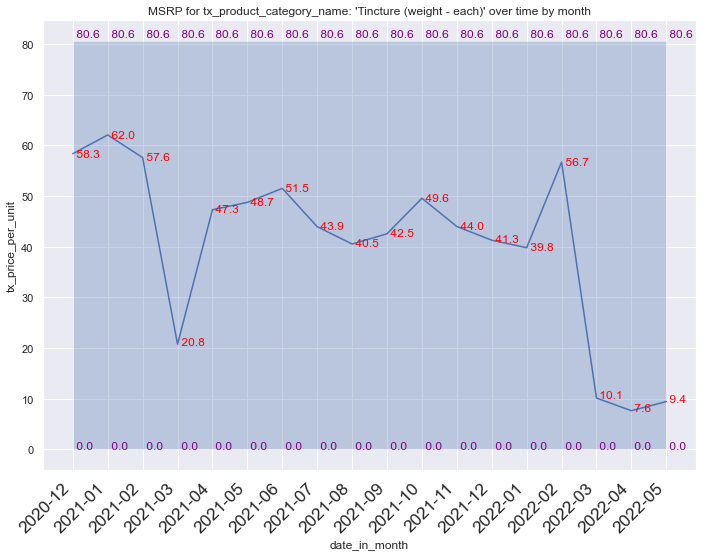

### % outliers for column category name Tincture (weight - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 15.5898716929715 %


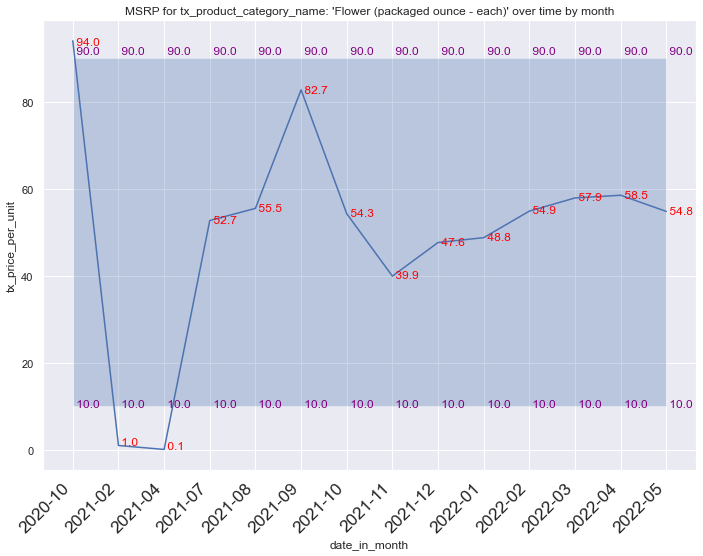

### % outliers for column category name Flower (packaged ounce - each) is 42.66% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


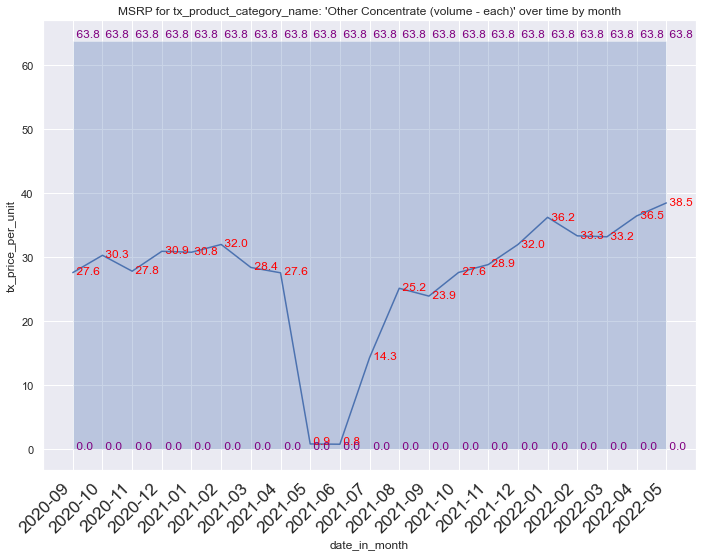

### % outliers for column category name Other Concentrate (volume - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


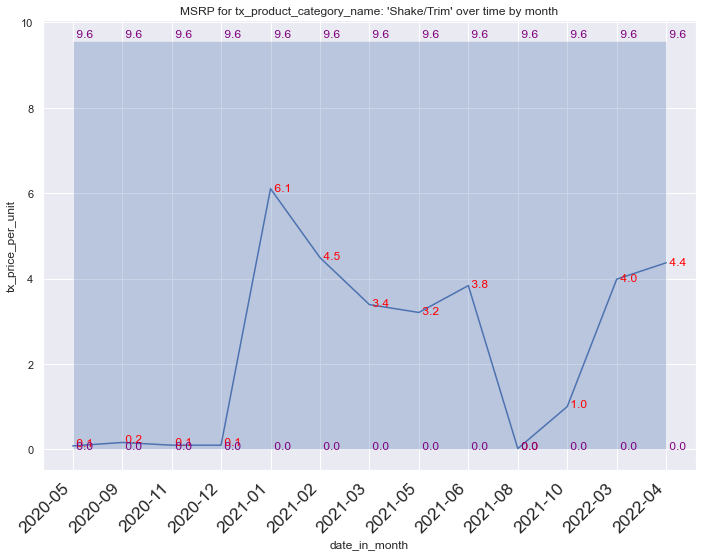

### % outliers for column category name Shake/Trim is 39.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.16129032258064516 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.903225806451613 %


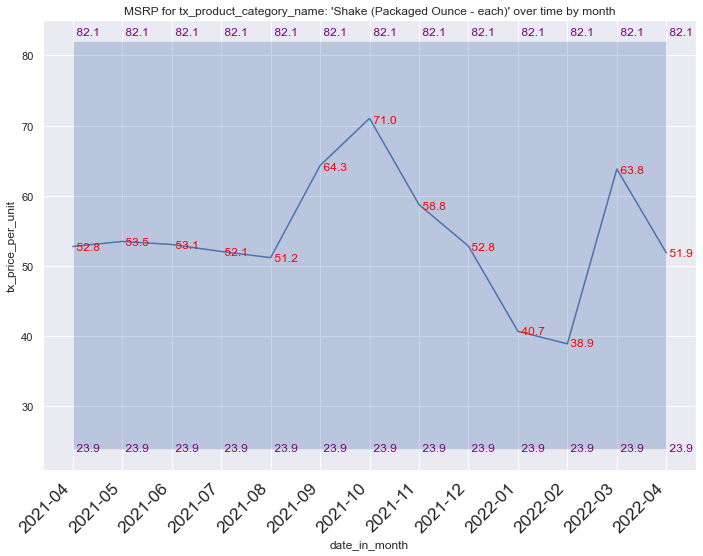

### % outliers for column category name Shake (Packaged Ounce - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.8115942028985508 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.36231884057971014 %


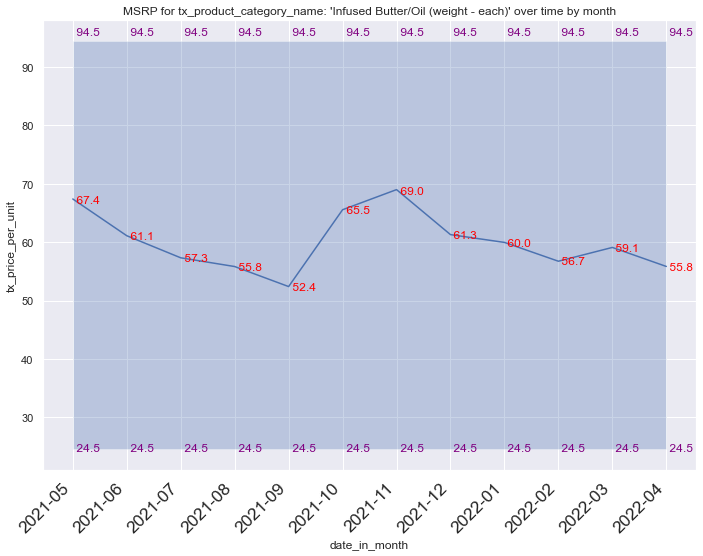

### % outliers for column category name Infused Butter/Oil (weight - each) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.5753739930955121 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.6329113924050633 %


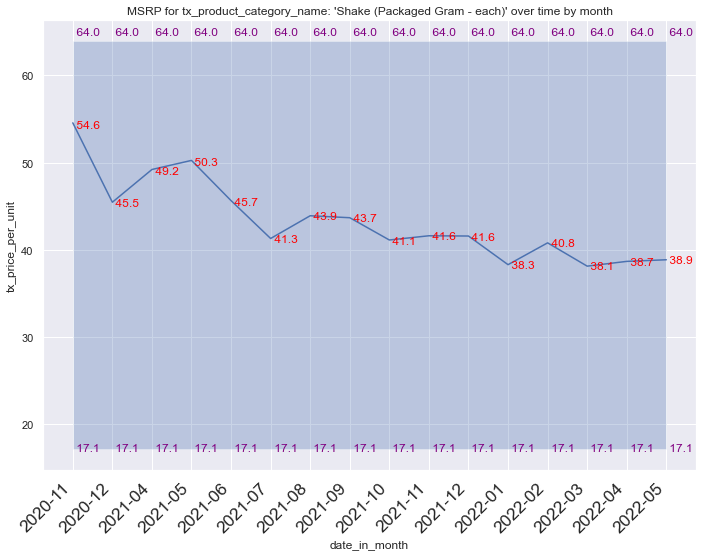

### % outliers for column category name Shake (Packaged Gram - each) is 0.0% ###
### Overall % outliers that are outside of time series band in column tx_product_category_name is 3.2% ###


In [10]:
mba_test.compare_entire_data_band('tx_product_category_name', 'S', 'minmax', use_unit_converted_price=False, ignore_non_unit_extractable_rows=False)

In [47]:
import numpy as np
np.std(sales_df.adjusted_tx_price_per_unit)

17.380177341795363

In [49]:
sales_df.groupby('tx_product_category_name').adjusted_tx_price_per_unit.std()

tx_product_category_name
Bud allocated for extraction            1.219940
Buds                                    3.170684
Capsule (weight - each)                26.702145
Concentrate                            19.303122
Concentrate (Each)                     29.511828
Edible (volume - each)                 11.110456
Edible (weight - each)                  7.469114
Extract (volume - each)                 8.036898
Extract (weight - each)                14.807914
Extract (weight)                        3.249987
Flower                                  4.370297
Flower (packaged - each)               16.919559
Flower (packaged eighth - each)         4.774450
Flower (packaged gram - each)           6.930348
Flower (packaged half ounce - each)     3.563971
Flower (packaged ounce - each)          1.914359
Flower (packaged quarter - each)        3.336846
Infused (edible)                        9.212153
Infused (non-edible)                   14.852443
Infused Butter/Oil (volume - each)          